In [29]:
import pandas as pd
import numpy as onp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [30]:
df = pd.read_csv('2q.txt')
df.head(25)

,time,rho_1_ee,rho_2_ee,rho_1_gg,rho_2_gg,coh_1_eg,coh_2_eg,omega_x,gamma,J
0,0.00,1.000000,0.000000,0.000000,1.000000,0j,0j,1.0,0.3,1.0
1,0.01,0.996880,0.000125,0.003120,0.999875,(-4.985585061310265e-08+0.00996138574853583j),(4.985585061310265e-08-0.00999133969774595j),1.0,0.3,1.0
2,0.02,0.993521,0.000498,0.006479,0.999502,(-3.978022859648929e-07+0.019841112498623567j),(3.978022859648929e-07-0.019960736896583703j),1.0,0.3,1.0
3,0.03,0.989927,0.001118,0.010073,0.998882,(-1.3388828601844068e-06+0.029632598658179375j),(1.338882860184461e-06-0.029901306004974763j),1.0,0.3,1.0
4,0.04,0.986101,0.001983,0.013899,0.998017,(-3.1645028145361543e-06+0.03932935504397791j),(3.1645028145362627e-06-0.03980623071215757j),1.0,0.3,1.0
5,0.05,0.982045,0.003092,0.017955,0.996908,(-6.162283340737252e-06+0.04892498857254566j),(6.162283340737252e-06-0.049668768653848554j),1.0,0.3,1.0
6,0.06,0.977763,0.004441,0.022237,0.995559,(-1.0615890094853569e-05+0.05841320660235218j),(1.0615890094853569e-05-0.05948225573141885j),1.0,0.3,1.0
7,0.07,0.973258,0.006028,0.026742,0.993972,(-1.6804770885618398e-05+0.0677878235711964j),(1.6804770885618832e-05-0.069240113069232j),1.0,0.3,1.0
8,0.08,0.968535,0.007852,0.031465,0.992148,(-2.500399268051635e-05+0.07704276510646531j),(2.500399268051635e-05-0.07893585136251352j),1.0,0.3,1.0
9,0.09,0.963596,0.009908,0.036404,0.990092,(-3.5484099308685964e-05+0.08617207162078816j),(3.548409930868553e-05-0.08856307465979373j),1.0,0.3,1.0


In [31]:
coh_eg = onp.array(df['coh_1_eg'],dtype=complex)
df['coh_1_eg'] = coh_eg

coh_ge = onp.array(df['coh_2_eg'],dtype=complex)
df['coh_2_eg'] = coh_ge

In [32]:
t_axis = onp.array(df['time'].values)
t_axis.shape

(801,)

In [33]:
import numpy as onp
import jax.numpy as np
from jax import random, grad, vmap, jit, jacfwd, jacrev
from jax.example_libraries import optimizers
from jax.experimental.ode import odeint
from jax.nn import relu
from jax import lax
from jax.flatten_util import ravel_pytree
import itertools
from functools import partial
from torch.utils import data
from tqdm import trange 

import scipy.io
from scipy.interpolate import griddata
from scipy.linalg import lstsq
from scipy.optimize import lsq_linear
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import  least_squares

from scipy.integrate import odeint  as scipy_odeint
from mpl_toolkits.mplot3d import Axes3D

In [34]:
from jax.lib import xla_bridge
from jax import device_get
import jax

print('device: ', jax.devices())
print('platform: ', jax.default_backend())


# a quick GPU-heavy op
a = np.ones((2000,2000))
b = np.ones((2000,2000))
c = a @ b   # JAX builds the computation; will run on GPU when executed
print("result shape:", c.shape)
# force execution and transfer small scalar to host
print("sum:", float(device_get(c.sum())))

device:  [CudaDevice(id=0)]
platform:  gpu
result shape: (2000, 2000)


KeyboardInterrupt: 

In [13]:
def MLP(layers, activation=np.tanh):

    def init_layer(key, d_in, d_out):

        k1, _ = random.split(key)

        glorot_stddev = 1.0 / np.sqrt((d_in + d_out)/2.0)

        W = glorot_stddev * random.normal(k1, (d_in, d_out))
        b = np.zeros(d_out)

        return W, b
    
    def init(rng_key):

        _, *keys = random.split(rng_key, len(layers))
        params = list(map(init_layer, keys, layers[:-1], layers[1:]))

        return params
    
    def apply(params, inputs):

        for W,b in params[:-1]:
            output = np.dot(inputs, W) + b
            inputs = activation(output)

        W,b = params[-1]
        output = np.dot(inputs, W) + b
        
        return output

    return init, apply 

In [14]:
def complex_matrix_to_realflat(mat):
    N = mat.shape[0]
    real = np.real(mat).ravel()
    imag = np.imag(mat).ravel()
    return np.concatenate([real, imag])

class PINN:

    # --------------------------------------------------------------------------------#
    # Properties of the PINN                                                          #
    # --------------------------------------------------------------------------------#
    def __init__(self, layers, states0, t0, t1, tol, H, sigmam, gamma):
        
        self.states0 = states0
        self.t0 = t0
        self.t1 = t1

        self.trace_lambda = 0.000001
        self.resid_lambda = 1.0

        # grid
        n_t = 300
        eps = self.t1 * 0.1
        self.t = np.linspace(self.t0, self.t1 + eps, n_t)

        self.M = np.triu(np.ones((n_t, n_t)), k=1).T
        self.tol = tol

        # hamiltonain and meta-parameters
        self.H = np.asarray(H, dtype=np.complex64)
        self.N = self.H.shape[0]

        self.sigma_minus = sigmam
        self.gamma = gamma
        self.L_op = self.sigma_minus


        self.init, self.apply = MLP(layers, activation=np.tanh)

        params = self.init(random.PRNGKey(1234))

        # optimizare properties
        self.opt_init, \
        self.opt_update, \
        self.get_params = optimizers.adam(optimizers.exponential_decay(1e-3, decay_steps=5000, decay_rate=0.9))

        self.opt_state = self.opt_init(params)
        _, self.unravel = ravel_pytree(params)

        # logger
        self.itercount = itertools.count()

        self.loss_log = []
        self.loss_res_log = []


    # --------------------------------------------------------------------------------#
    # Define Nueral Networks and Get Functions                                        #
    # --------------------------------------------------------------------------------#
    def neural_net(self, params, t):

        t = np.reshape(t, (1,))

        outputs = self.apply(params, t) * t
        out = outputs.ravel()
        ic = self.states0

        N = self.N

        n_off = N*(N-1)//2  # 6

        diag = out[:N] + ic[:N]
        off_re = out[N:N+n_off] + ic[N:N+n_off]
        off_im = out[N+n_off:N+2*n_off] + ic[N+n_off:N+2*n_off]

        rho = np.zeros((N, N), dtype=np.complex64)

        # Set diagonal (force real immediately)
        rho = rho.at[np.diag_indices(N)].set(diag.astype(np.float32))

        # Set strictly lower-triangular part
        tri_idx = np.tril_indices(N, -1)
        l_off = off_re + 1j * off_im
        rho = rho.at[tri_idx].set(l_off)

        u_off = np.conj(l_off)
        tri_idx_upper = (tri_idx[1], tri_idx[0])  # swap row/col indices
        rho = rho.at[tri_idx_upper].set(u_off)

        #jax.debug.print("rho = \n{}", rho)

        return rho
    
    def rho_flat_realimag(self, params, t):
        
        rho = self.neural_net(params, t)

        return complex_matrix_to_realflat(rho)


    # --------------------------------------------------------------------------------#
    # Lindblad Master Equations                                                       #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def lindblad_rhs(self, rho):

        comm = -1j * (self.H @ rho - rho @ self.H)

        dissipation = 0
        for L in self.L_op:
            LL = L.conj().T @ L
            dissipation += self.gamma * (L @ rho @ L.conj().T - 0.5 * (LL @ rho + rho @ LL))

        return comm + dissipation
    
    @partial(jit, static_argnums=(0,))
    def lindblad_loss(self, rho, drho_dt):

        rhs = self.lindblad_rhs(rho)
        R = drho_dt - rhs

        return np.real(np.trace(R.conj().T @ R))


    # --------------------------------------------------------------------------------#
    # Construct Rho and calculate Residual Loss                                       #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def residual_net(self, params, t):

        # constructing rho
        rho = self.neural_net(params, t)

        drho_dt_flat = jax.jacrev(lambda tt: self.rho_flat_realimag(params, tt))(t)

        N = self.N
        drho_dt_re = drho_dt_flat[:N*N].reshape((N,N))
        drho_dt_im = drho_dt_flat[N*N:].reshape((N,N))

        drho_dt = drho_dt_re + 1j*drho_dt_im 

        loss = self.lindblad_loss(rho, drho_dt)

        return loss
    

    # --------------------------------------------------------------------------------#
    # Causal Training and construction of Different Loss                              #
    # --------------------------------------------------------------------------------#    
    @partial(jit, static_argnums=(0,))
    def residuals_and_weights(self, params, tol):

        rho_res = vmap(self.residual_net, (None, 0))(params, self.t)

        W = lax.stop_gradient(np.exp( - tol * self.M @ (rho_res)))

        return rho_res, W
    
    @partial(jit, static_argnums=(0,))
    def loss_res(self, params):

        rho_res, W = self.residuals_and_weights(params, self.tol)
        loss_res = np.mean(W * (rho_res))

        return loss_res

    @partial(jit, static_argnums=(0,))
    def loss(self, params):

        loss_res = self.loss_res(params)

        loss = loss_res

        return loss


    # --------------------------------------------------------------------------------#
    # Update/Optimizer step                                                           #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def step(self, i, opt_state):

        params = self.get_params(opt_state)
        g = grad(self.loss)(params)

        return self.opt_update(i, g, opt_state)

    # --------------------------------------------------------------------------------#
    # Training Loop                                                                   #
    # --------------------------------------------------------------------------------#
    def train(self, nIter=10000):

        pbar = trange(nIter)

        for it in pbar:

            self.current_count = next(self.itercount)
            self.opt_state = self.step(self.current_count, self.opt_state)

            if it % 1000 == 0:

                params = self.get_params(self.opt_state)

                loss_value = self.loss(params)
                loss_res_value = self.loss_res(params)

                _, W_value = self.residuals_and_weights(params, self.tol)

                loss_value.block_until_ready()
                loss_res_value.block_until_ready()
                W_value.block_until_ready()
            
                loss_value_h = float(device_get(loss_value))
                loss_res_value_h = float(device_get(loss_res_value))
                W_value_h = device_get(W_value)

                self.loss_log.append(loss_value_h)
                self.loss_res_log.append(loss_res_value_h)

                pbar.set_postfix({
                    'L' : loss_value_h,
                    'RES' : loss_res_value_h,
                    'W_min' : float(W_value_h.min()),
                })

                if float(W_value_h.min()) > 0.99:
                    break

    # --------------------------------------------------------------------------------#
    # Predictions                                                                     #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def predict_u(self, params, t_star):
        # L(t) for each time
        rho = vmap(self.neural_net, (None, 0))(params, t_star)  # (N_time, N, N)

        return rho

In [2]:
from qutip import *
import numpy as onp

rho0 = tensor(basis(2,1), basis(2,0)).proj()

state0 = onp.asarray(rho0.full(), dtype=onp.complex64)
print(state0)

I  = qeye(2)
sm = destroy(2)
sz, sx, sy = sigmaz(), sigmax(), sigmay()
sz1, sz2 = tensor(sz, I), tensor(I, sz)
sx1, sx2 = tensor(sx, I), tensor(I, sx)
sy1, sy2 = tensor(sy, I), tensor(I, sy)
omega_x = 1.0
gamma = 0.3
J = 1.0

H = omega_x*sx1 + omega_x*sx2
H += (J/4) * (sx1*sx2+ sy1*sy2 + sz1*sz2)
H = onp.asarray(H.full(), dtype=onp.complex64)
print(H)

sm = onp.array([[0., 1.],
               [0., 0.]], dtype=onp.complex64)
I2 = onp.eye(2, dtype=onp.complex64)
# two-qubit lowering operators (4x4)
sm1 = onp.kron(sm, I2).astype(onp.complex64)   # acts on qubit 1
sm2 = onp.kron(I2, sm).astype(onp.complex64)   # acts on qubit 2
sigmam = [sm1, sm2]

print(sm1)
print(sm2)

print(rho0)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[ 0.25+0.j  1.  +0.j  1.  +0.j  0.  +0.j]
 [ 1.  +0.j -0.25+0.j  0.5 +0.j  1.  +0.j]
 [ 1.  +0.j  0.5 +0.j -0.25+0.j  1.  +0.j]
 [ 0.  +0.j  1.  +0.j  1.  +0.j  0.25+0.j]]
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


In [16]:
def get_state0(rho):

    N = np.shape(rho)[0] 

    diag = np.real(np.diag(rho))

    re_lower = []
    im_lower = []

    for i in range(N):
        for j in range(i):
            val = rho[i,j]
            re_lower.append(val.real)
            im_lower.append(val.imag)

    state0 = np.concatenate([diag, np.array(re_lower), np.array(im_lower)])
    
    return state0

state0 = get_state0(rho0.full())
print(state0)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
t0 = 0.0
t1 = 1.0

tol = 0.1
tol_list = [1e-3, 1e-2, 1e-1, 1e-0] # there was a 1e-3

layers = [1, 128, 128, 128, 16]

rho_pred_list = []
params_list = []
losses_list = []


T = 8
t = np.round(np.arange(t0, t1, 0.01),2)
N = state0.shape[0]

print(t.shape)
print(N)

(100,)
16


Final Time: 1.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
tol :  0.001


  4%|▍         | 2000/50000 [00:06<02:24, 333.10it/s, L=0.00109, RES=0.00109, W_min=1]   


tol :  0.01


  0%|          | 0/50000 [00:00<?, ?it/s, L=0.00102, RES=0.00102, W_min=0.997]


tol :  0.1


 16%|█▌        | 8000/50000 [00:05<00:26, 1568.14it/s, L=0.00034, RES=0.00034, W_min=0.99]   


tol :  1.0


 44%|████▍     | 22000/50000 [00:14<00:17, 1562.80it/s, L=2.95e-5, RES=2.95e-5, W_min=0.991]  


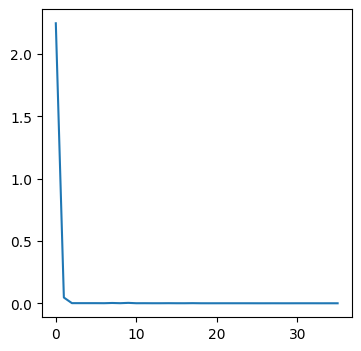

rho_preds.shape: (100, 4, 4)
t_f: 1.0
states.shape: (8, 100)
Relative l2 error rho_1_ee     : 3.446e-04
Relative l2 error rho_1_gg     : 6.624e-04
Relative l2 error rho_2_ee     : 3.014e-04
Relative l2 error rho_2_gg     : 1.210e-04
Relative l2 error coh_1_eg_re  : 2.652e-02
Relative l2 error coh_1_eg_im  : 1.260e-03
Relative l2 error coh_2_eg_re  : 7.089e-03
Relative l2 error coh_2_eg_im  : 1.230e-03
Final Time: 2.0
[ 2.82691717e-01  3.83982062e-01  1.72941804e-01  1.60152391e-01
  1.50140494e-01 -1.50350079e-01 -1.23369515e-01  1.23303257e-01
  1.24970585e-01 -1.24200352e-01 -2.45784864e-01  1.20297596e-02
 -1.30737841e-01 -1.36722811e-04  9.88765955e-02 -5.00911772e-02]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:45, 216.93it/s, L=0.00763, RES=0.00763, W_min=0.998]


tol :  0.01


  2%|▏         | 1000/50000 [00:00<00:31, 1559.21it/s, L=0.00287, RES=0.00287, W_min=0.991]


tol :  0.1


  8%|▊         | 4000/50000 [00:02<00:29, 1561.42it/s, L=0.000323, RES=0.000323, W_min=0.991]


tol :  1.0


 42%|████▏     | 21000/50000 [00:13<00:18, 1557.94it/s, L=2.1e-5, RES=2.1e-5, W_min=0.994]    


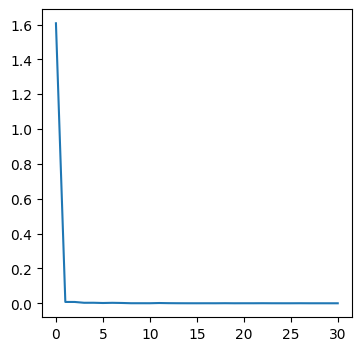

rho_preds.shape: (200, 4, 4)
t_f: 2.0
states.shape: (8, 200)
Relative l2 error rho_1_ee     : 5.374e-04
Relative l2 error rho_1_gg     : 8.094e-04
Relative l2 error rho_2_ee     : 1.175e-03
Relative l2 error rho_2_gg     : 5.159e-04
Relative l2 error coh_1_eg_re  : 1.406e-02
Relative l2 error coh_1_eg_im  : 1.634e-03
Relative l2 error coh_2_eg_re  : 3.726e-03
Relative l2 error coh_2_eg_im  : 1.813e-03
Final Time: 3.0
[ 1.8308693e-01  2.3044707e-01  3.4831011e-01  2.3783123e-01
 -6.8985015e-02  6.9167167e-02 -4.6131030e-02  4.5778871e-02
 -1.2381080e-01  1.2404104e-01 -4.3752879e-02  3.6881216e-02
 -1.7161383e-01  4.3064356e-05 -7.4864596e-02 -1.3628778e-01]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:42, 220.71it/s, L=0.0072, RES=0.0072, W_min=0.998]


tol :  0.01


  4%|▍         | 2000/50000 [00:01<00:30, 1556.86it/s, L=0.00117, RES=0.00117, W_min=0.997]


tol :  0.1


  4%|▍         | 2000/50000 [00:01<00:30, 1561.02it/s, L=0.000217, RES=0.000217, W_min=0.994]


tol :  1.0


 38%|███▊      | 19000/50000 [00:12<00:19, 1553.11it/s, L=1.83e-5, RES=1.83e-5, W_min=0.995]  


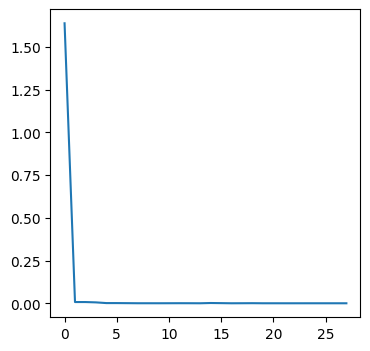

rho_preds.shape: (300, 4, 4)
t_f: 3.0
states.shape: (8, 300)
Relative l2 error rho_1_ee     : 6.146e-04
Relative l2 error rho_1_gg     : 7.145e-04
Relative l2 error rho_2_ee     : 1.275e-03
Relative l2 error rho_2_gg     : 7.059e-04
Relative l2 error coh_1_eg_re  : 1.094e-02
Relative l2 error coh_1_eg_im  : 2.106e-03
Relative l2 error coh_2_eg_re  : 2.957e-03
Relative l2 error coh_2_eg_im  : 1.670e-03
Final Time: 4.0
[ 1.81382537e-01  4.96865988e-01  1.24176145e-01  1.97234988e-01
  2.29630917e-02 -2.30005234e-02 -4.26062942e-03  3.66251916e-03
 -2.60999948e-02  2.61992738e-02 -6.65925890e-02 -7.84128904e-03
  1.90799087e-02 -1.91680621e-04  3.10564563e-02 -3.52448747e-02]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:41, 221.21it/s, L=0.00641, RES=0.00641, W_min=0.998]


tol :  0.01


  2%|▏         | 1000/50000 [00:00<00:31, 1553.66it/s, L=0.0028, RES=0.0028, W_min=0.992] 


tol :  0.1


  6%|▌         | 3000/50000 [00:01<00:30, 1555.72it/s, L=0.000194, RES=0.000194, W_min=0.994]


tol :  1.0


 30%|███       | 15000/50000 [00:09<00:22, 1552.04it/s, L=1.96e-5, RES=1.96e-5, W_min=0.994]  


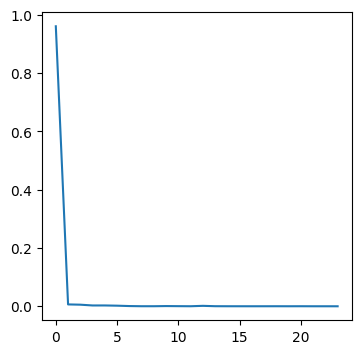

rho_preds.shape: (400, 4, 4)
t_f: 4.0
states.shape: (8, 400)
Relative l2 error rho_1_ee     : 6.279e-04
Relative l2 error rho_1_gg     : 8.172e-04
Relative l2 error rho_2_ee     : 1.118e-03
Relative l2 error rho_2_gg     : 7.042e-04
Relative l2 error coh_1_eg_re  : 9.717e-03
Relative l2 error coh_1_eg_im  : 2.360e-03
Relative l2 error coh_2_eg_re  : 2.712e-03
Relative l2 error coh_2_eg_im  : 2.152e-03
Final Time: 5.0
[ 2.85561025e-01  2.28666693e-01  2.71295786e-01  2.14453354e-01
 -4.57864180e-02  4.57640439e-02 -3.52956280e-02  3.47069241e-02
 -6.25324324e-02  6.22869059e-02  2.70715728e-02 -1.21643044e-01
  5.28530590e-03  1.26291532e-04 -5.25045320e-02 -3.20078060e-03]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:41, 221.65it/s, L=0.00176, RES=0.00176, W_min=0.999]


tol :  0.01


  0%|          | 0/50000 [00:00<?, ?it/s, L=0.00176, RES=0.00176, W_min=0.995]


tol :  0.1


  8%|▊         | 4000/50000 [00:02<00:29, 1559.20it/s, L=0.000169, RES=0.000169, W_min=0.995]


tol :  1.0


 18%|█▊        | 9000/50000 [00:05<00:26, 1553.52it/s, L=3.18e-5, RES=3.18e-5, W_min=0.991]  


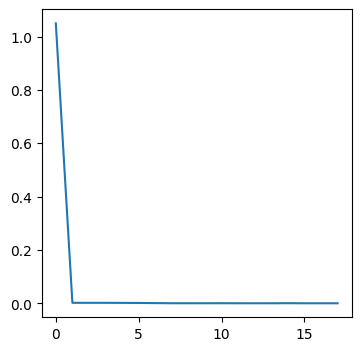

rho_preds.shape: (500, 4, 4)
t_f: 5.0
states.shape: (8, 500)
Relative l2 error rho_1_ee     : 6.044e-04
Relative l2 error rho_1_gg     : 7.672e-04
Relative l2 error rho_2_ee     : 1.125e-03
Relative l2 error rho_2_gg     : 7.773e-04
Relative l2 error coh_1_eg_re  : 9.990e-03
Relative l2 error coh_1_eg_im  : 2.554e-03
Relative l2 error coh_2_eg_re  : 3.121e-03
Relative l2 error coh_2_eg_im  : 2.295e-03
Final Time: 6.0
[ 2.25844979e-01  2.89309502e-01  2.46787846e-01  2.38164067e-01
  1.37448981e-02 -1.35888755e-02  1.87968835e-03 -2.00959668e-03
  4.12835851e-02 -4.10130993e-02 -1.85068063e-02 -5.38980439e-02
  8.78502950e-02  8.44432507e-05 -4.86258231e-02 -7.14490861e-02]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:41, 221.02it/s, L=0.00207, RES=0.00207, W_min=0.999]


tol :  0.01


  0%|          | 0/50000 [00:00<?, ?it/s, L=0.00271, RES=0.00271, W_min=0.992]


tol :  0.1


 12%|█▏        | 6000/50000 [00:03<00:28, 1551.41it/s, L=0.000261, RES=0.000261, W_min=0.992]


tol :  1.0


 22%|██▏       | 11000/50000 [00:07<00:25, 1549.88it/s, L=3.07e-5, RES=3.07e-5, W_min=0.991] 


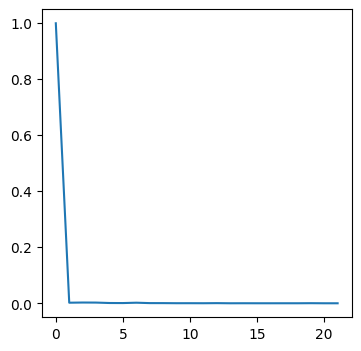

rho_preds.shape: (600, 4, 4)
t_f: 6.0
states.shape: (8, 600)
Relative l2 error rho_1_ee     : 7.754e-04
Relative l2 error rho_1_gg     : 8.700e-04
Relative l2 error rho_2_ee     : 1.037e-03
Relative l2 error rho_2_gg     : 7.479e-04
Relative l2 error coh_1_eg_re  : 9.939e-03
Relative l2 error coh_1_eg_im  : 3.417e-03
Relative l2 error coh_2_eg_re  : 3.696e-03
Relative l2 error coh_2_eg_im  : 2.543e-03
Final Time: 7.0
[ 2.3192602e-01  2.0500618e-01  3.1832230e-01  2.4392964e-01
 -1.5606765e-02  1.6216069e-02 -2.1028440e-03  1.4437339e-03
  2.0984098e-02 -2.0686559e-02 -1.3755150e-02 -5.9713982e-02
 -1.4253661e-02 -1.0338053e-04 -4.2918827e-02 -1.3062730e-03]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:51, 211.60it/s, L=0.00107, RES=0.00107, W_min=1]


tol :  0.01


  0%|          | 0/50000 [00:00<?, ?it/s, L=0.00117, RES=0.00117, W_min=0.997]


tol :  0.1


 14%|█▍        | 7000/50000 [00:04<00:27, 1554.88it/s, L=0.000307, RES=0.000307, W_min=0.991]


tol :  1.0


  6%|▌         | 3000/50000 [00:01<00:30, 1547.63it/s, L=3.32e-5, RES=3.32e-5, W_min=0.99]   


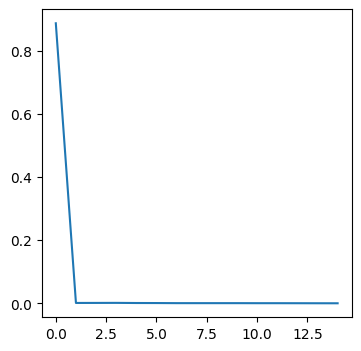

rho_preds.shape: (700, 4, 4)
t_f: 7.0
states.shape: (8, 700)
Relative l2 error rho_1_ee     : 1.100e-03
Relative l2 error rho_1_gg     : 9.657e-04
Relative l2 error rho_2_ee     : 1.044e-03
Relative l2 error rho_2_gg     : 9.086e-04
Relative l2 error coh_1_eg_re  : 1.110e-02
Relative l2 error coh_1_eg_im  : 4.023e-03
Relative l2 error coh_2_eg_re  : 4.903e-03
Relative l2 error coh_2_eg_im  : 3.096e-03
Final Time: 8.0
[ 2.7068502e-01  2.4905723e-01  2.5130343e-01  2.2955382e-01
  6.8625025e-03 -6.4874850e-03 -5.0580306e-03  4.4896589e-03
  2.7210720e-02 -2.6949689e-02 -6.7899130e-02 -1.1845157e-03
  1.5846003e-02  1.3810280e-04 -2.8717378e-02 -4.2412899e-02]
tol :  0.001


  2%|▏         | 1000/50000 [00:04<03:42, 219.78it/s, L=0.000578, RES=0.000578, W_min=1]


tol :  0.01


  0%|          | 0/50000 [00:00<?, ?it/s, L=0.000579, RES=0.000579, W_min=0.998]


tol :  0.1


  4%|▍         | 2000/50000 [00:01<00:30, 1550.50it/s, L=0.000256, RES=0.000256, W_min=0.992]


tol :  1.0


 24%|██▍       | 12000/50000 [00:07<00:24, 1549.96it/s, L=3.35e-5, RES=3.35e-5, W_min=0.99]   


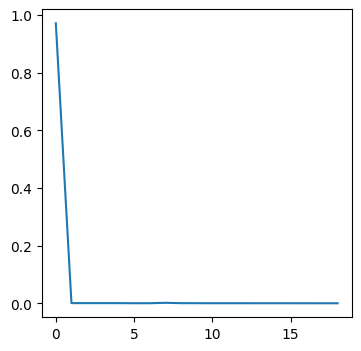

rho_preds.shape: (800, 4, 4)
t_f: 8.0
states.shape: (8, 800)
Relative l2 error rho_1_ee     : 1.086e-03
Relative l2 error rho_1_gg     : 9.209e-04
Relative l2 error rho_2_ee     : 1.062e-03
Relative l2 error rho_2_gg     : 9.921e-04
Relative l2 error coh_1_eg_re  : 1.496e-02
Relative l2 error coh_1_eg_im  : 4.313e-03
Relative l2 error coh_2_eg_re  : 5.877e-03
Relative l2 error coh_2_eg_im  : 3.579e-03


In [18]:
for k in range(int(T/t1)):

    # initialize model
    print('Final Time: {}'.format( (k+1) * t1))
    
    print(state0)
    
    model = PINN(layers, state0, t0, t1, tol, H, sigmam, gamma)

    for tol in tol_list:
        model.tol = tol
        print('tol : ', model.tol)

        model.train(nIter=50000)

    params = model.get_params(model.opt_state)
    rho_pred = model.predict_u(params, t)

    rho = model.neural_net(params, model.t1)
    state0 = get_state0(onp.asarray(rho))

    # store predictions
    rho_pred_list.append(rho_pred)
    losses_list.append(model.loss_res_log)

    # store params
    flat_params, _ = ravel_pytree(params)
    params_list.append(flat_params)

    np.save('rho_pred_list.npy', rho_pred_list)
    np.save('params_list.npy', params_list)
    np.save('losses_list.npy', onp.array(losses_list, dtype=object), allow_pickle=True)

    plt.figure(figsize=(4, 4))
    plt.plot(np.arange(0, len(model.loss_log), 1),model.loss_log)
    plt.show()
    #error
    #Build host (NumPy) concatenated predictions

    # === 1) build rho_preds along time axis ===
    # Each element in rho_pred_list should be shape (n_time_chunk, 4, 4)
    rho_preds = np.concatenate([np.asarray(x) for x in rho_pred_list], axis=0)  # shape (N_time,4,4)
    print("rho_preds.shape:", rho_preds.shape)

    # === 2) find indices and slice df consistently (include idx_t1) ===
    idx_t0 = df.index[df['time'] == t0][0]
    t_f = onp.round((k+1) * t1, 2)
    print("t_f:", t_f)
    idx_t1 = df.index[df['time'] == t_f][0]

    # include idx_t1 in slice -> use idx_t1+1 for Python slice
    df_slice = df.iloc[idx_t0: idx_t1]

    # === 3) build states from the dataframe slice ===
    states = np.array([
        df_slice['rho_1_ee'].values,
        df_slice['rho_2_ee'].values,
        df_slice['rho_1_gg'].values,
        df_slice['rho_2_gg'].values,
        df_slice['coh_1_eg'].values.real,
        df_slice['coh_1_eg'].values.imag,
        df_slice['coh_2_eg'].values.real,
        df_slice['coh_2_eg'].values.imag
    ])  # shape (8, N_time)
    print("states.shape:", states.shape)

    # === 4) sanity-check time lengths match ===
    N_pred = rho_preds.shape[0]
    N_true = states.shape[1]
    if N_pred != N_true:
        raise RuntimeError(f"Mismatch in time-lengths: predictions={N_pred}, ground-truth={N_true}."
                        " Check concatenation axis and df slicing (inclusive/exclusive).")

    # === 5) compute target arrays from rho_preds ===
    true_rho1_ee = np.real(rho_preds[:, 2, 2] + rho_preds[:, 3, 3])   # (N_time,)
    true_rho1_gg = np.real(rho_preds[:, 0, 0] + rho_preds[:, 1, 1])
    true_rho2_ee = np.real(rho_preds[:, 1, 1] + rho_preds[:, 3, 3])
    true_rho2_gg = np.real(rho_preds[:, 0, 0] + rho_preds[:, 2, 2])

    true_coh1 = rho_preds[:, 2, 0] + rho_preds[:, 3, 1]   # complex (N_time,)
    true_coh1_re = np.real(true_coh1)
    true_coh1_im = np.imag(true_coh1)

    true_coh2 = rho_preds[:, 1, 0] + rho_preds[:, 3, 2]
    true_coh2_re = np.real(true_coh2)
    true_coh2_im = np.imag(true_coh2)

    # === 6) compute relative L2 errors (with correct denominators) ===
    eps = 1e-12

    err_rho_1_ee   = np.linalg.norm(true_rho1_ee - states[0, :]) / (np.linalg.norm(states[0, :]) + eps)
    err_rho_2_ee   = np.linalg.norm(true_rho2_ee - states[1, :]) / (np.linalg.norm(states[1, :]) + eps)
    err_rho_1_gg   = np.linalg.norm(true_rho1_gg - states[2, :]) / (np.linalg.norm(states[2, :]) + eps)
    err_rho_2_gg   = np.linalg.norm(true_rho2_gg - states[3, :]) / (np.linalg.norm(states[3, :]) + eps)

    # NOTE: use the coherence rows as denominators (states[4], states[5], ...)
    err_coh_1_eg_re = np.linalg.norm(true_coh1_re - states[4, :]) / (np.linalg.norm(states[4, :]) + eps)
    err_coh_1_eg_im = np.linalg.norm(true_coh1_im - states[5, :]) / (np.linalg.norm(states[5, :]) + eps)
    err_coh_2_eg_re = np.linalg.norm(true_coh2_re - states[6, :]) / (np.linalg.norm(states[6, :]) + eps)
    err_coh_2_eg_im = np.linalg.norm(true_coh2_im - states[7, :]) / (np.linalg.norm(states[7, :]) + eps)

    print('Relative l2 error rho_1_ee     : {:.3e}'.format(err_rho_1_ee))
    print('Relative l2 error rho_1_gg     : {:.3e}'.format(err_rho_1_gg))
    print('Relative l2 error rho_2_ee     : {:.3e}'.format(err_rho_2_ee))
    print('Relative l2 error rho_2_gg     : {:.3e}'.format(err_rho_2_gg))

    print('Relative l2 error coh_1_eg_re  : {:.3e}'.format(err_coh_1_eg_re))
    print('Relative l2 error coh_1_eg_im  : {:.3e}'.format(err_coh_1_eg_im))
    print('Relative l2 error coh_2_eg_re  : {:.3e}'.format(err_coh_2_eg_re))
    print('Relative l2 error coh_2_eg_im  : {:.3e}'.format(err_coh_2_eg_im))




/tmp/ipykernel_26176/1341888107.py:125: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(t_axis, np.abs(coh1_pred), '--', label='coh1 pred |.|', linestyle=':')
/tmp/ipykernel_26176/1341888107.py:149: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(t_axis, np.abs(coh2_pred), '--', label='coh2 pred |.|', linestyle=':')


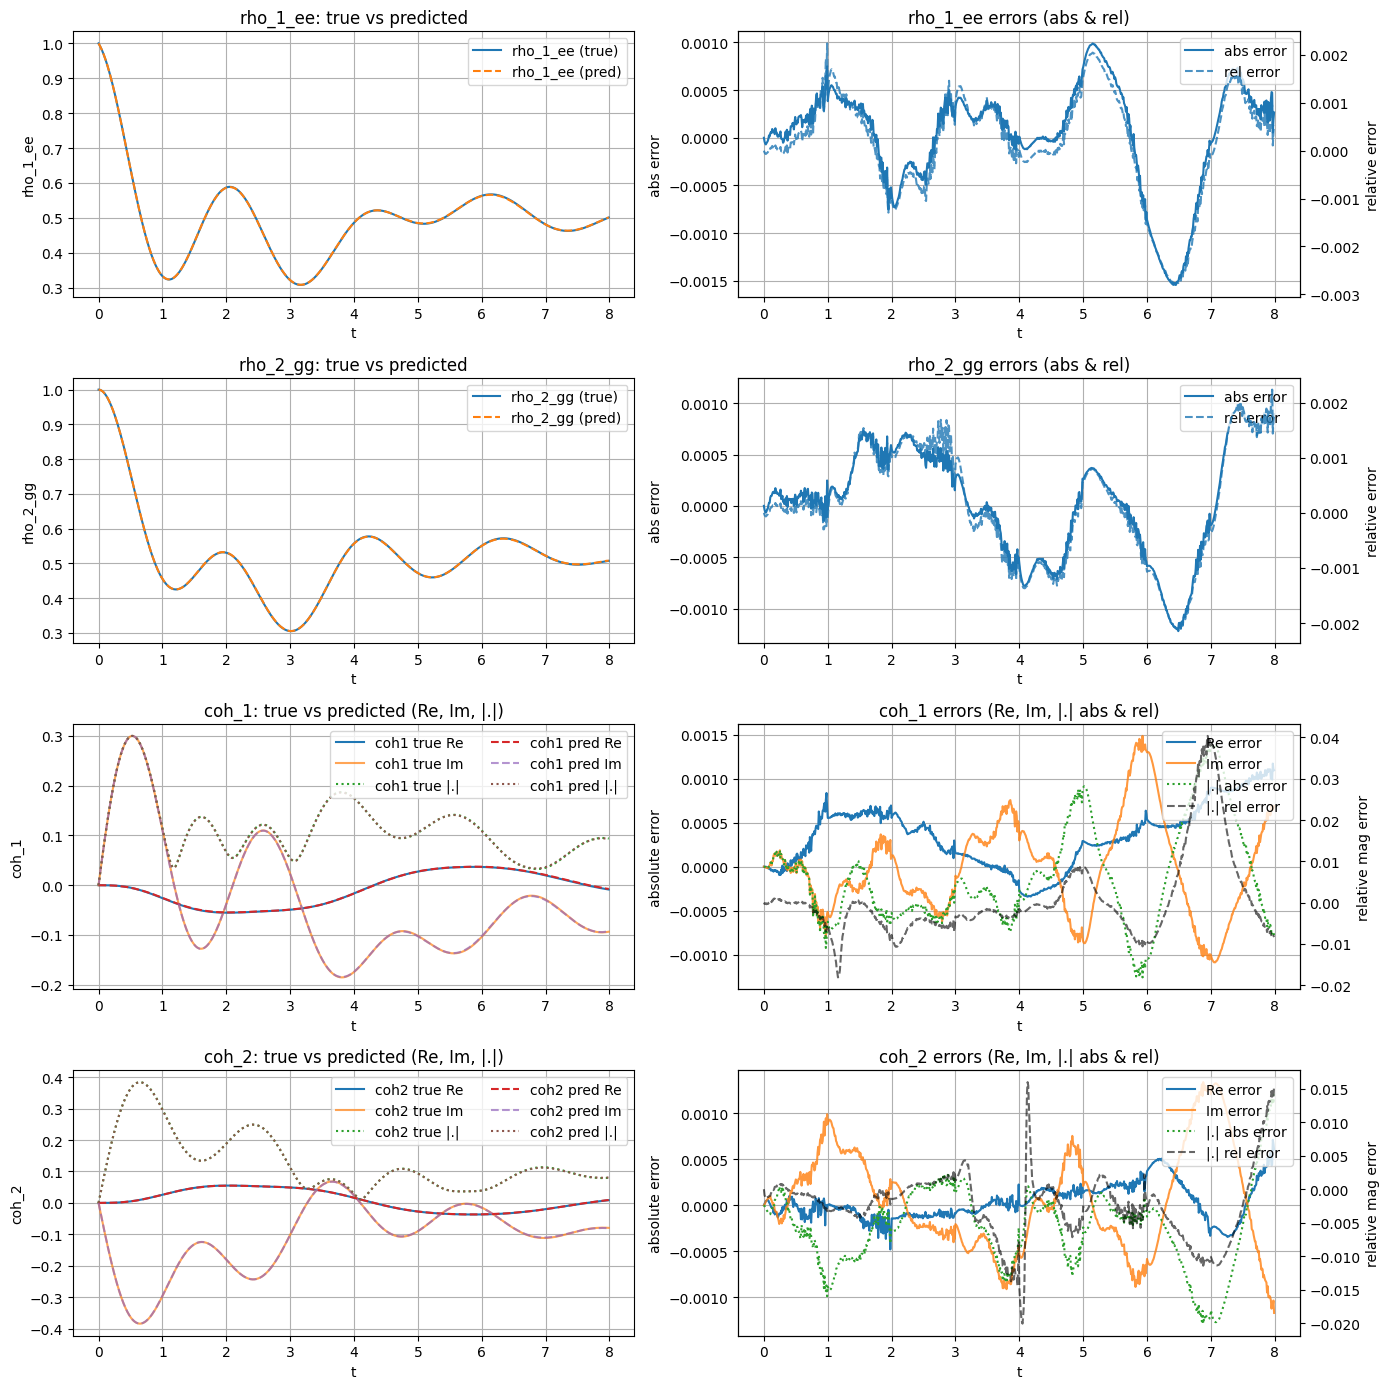

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import jax

# --- helper (use your existing to_host if you already have it) ---
def to_host(a):
    try:
        return np.asarray(jax.device_get(a))
    except Exception:
        return np.asarray(a)

# === prepare arrays (replace names if yours differ) ===
rho_preds = to_host(rho_preds)                 # shape (N_pred,4,4)
t_axis = to_host(np.asarray(df_slice['time'].values))

# true values from df_slice
rho1_ee_true = to_host(np.asarray(df_slice['rho_1_ee'].values))
rho2_gg_true = to_host(np.asarray(df_slice['rho_2_gg'].values))
# coherences: accept complex dtype or build from re/imag columns
if 'coh_1_eg' in df_slice.columns:
    coh1_true = to_host(np.asarray(df_slice['coh_1_eg'].values.astype(complex)))
else:
    coh1_true = (to_host(np.asarray(df_slice['coh_1_eg_re'].values)) +
                 1j * to_host(np.asarray(df_slice['coh_1_eg_im'].values)))

if 'coh_2_eg' in df_slice.columns:
    coh2_true = to_host(np.asarray(df_slice['coh_2_eg'].values.astype(complex)))
else:
    coh2_true = (to_host(np.asarray(df_slice['coh_2_eg_re'].values)) +
                 1j * to_host(np.asarray(df_slice['coh_2_eg_im'].values)))

# predicted values from rho_preds
rho1_ee_pred = to_host(np.real(rho_preds[:, 2, 2] + rho_preds[:, 3, 3]))
rho2_gg_pred = to_host(np.real(rho_preds[:, 0, 0] + rho_preds[:, 2, 2]))
coh1_pred = to_host(rho_preds[:, 2, 0] + rho_preds[:, 3, 1])
coh2_pred = to_host(rho_preds[:, 1, 0] + rho_preds[:, 3, 2])

# align lengths (trim to min length if mismatch)
N_pred = rho1_ee_pred.shape[0]
N_true = rho1_ee_true.shape[0]
if N_pred != N_true:
    N_min = min(N_pred, N_true)
    print(f"Warning: trimming to N_min={N_min} (pred={N_pred}, true={N_true})")
    rho1_ee_pred = rho1_ee_pred[:N_min]
    rho2_gg_pred = rho2_gg_pred[:N_min]
    coh1_pred = coh1_pred[:N_min]
    coh2_pred = coh2_pred[:N_min]

    rho1_ee_true = rho1_ee_true[:N_min]
    rho2_gg_true = rho2_gg_true[:N_min]
    coh1_true = coh1_true[:N_min]
    coh2_true = coh2_true[:N_min]
    t_axis = t_axis[:N_min]

# small regulariser to avoid div-by-zero in relative error
eps = 1e-12

# compute errors
err_rho1_abs = rho1_ee_pred - rho1_ee_true
err_rho1_rel = err_rho1_abs / (np.abs(rho1_ee_true) + eps)

err_rho2_abs = rho2_gg_pred - rho2_gg_true
err_rho2_rel = err_rho2_abs / (np.abs(rho2_gg_true) + eps)

# coherences: separate real, imag, magnitude errors
err_coh1_re = np.real(coh1_pred) - np.real(coh1_true)
err_coh1_im = np.imag(coh1_pred) - np.imag(coh1_true)
err_coh1_mag = np.abs(coh1_pred) - np.abs(coh1_true)
err_coh1_rel_mag = err_coh1_mag / (np.abs(coh1_true) + eps)

err_coh2_re = np.real(coh2_pred) - np.real(coh2_true)
err_coh2_im = np.imag(coh2_pred) - np.imag(coh2_true)
err_coh2_mag = np.abs(coh2_pred) - np.abs(coh2_true)
err_coh2_rel_mag = err_coh2_mag / (np.abs(coh2_true) + eps)

# === Plotting layout: 4 rows x 2 cols ===
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Row 0: rho_1_ee (left: true vs pred, right: abs + rel error)
ax = axes[0, 0]
ax.plot(t_axis, rho1_ee_true, label='rho_1_ee (true)')
ax.plot(t_axis, rho1_ee_pred, '--', label='rho_1_ee (pred)')
ax.set_title('rho_1_ee: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel('rho_1_ee'); ax.grid(True); ax.legend()

ax_err = axes[0, 1]
ax_err.plot(t_axis, err_rho1_abs, label='abs error')
ax_err.set_xlabel('t'); ax_err.set_ylabel('abs error')
ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_rho1_rel, '--', label='rel error', alpha=0.8)
ax2.set_ylabel('relative error')
# combine legends
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('rho_1_ee errors (abs & rel)')

# Row 1: rho_2_gg
ax = axes[1, 0]
ax.plot(t_axis, rho2_gg_true, label='rho_2_gg (true)')
ax.plot(t_axis, rho2_gg_pred, '--', label='rho_2_gg (pred)')
ax.set_title('rho_2_gg: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel('rho_2_gg'); ax.grid(True); ax.legend()

ax_err = axes[1, 1]
ax_err.plot(t_axis, err_rho2_abs, label='abs error')
ax_err.set_xlabel('t'); ax_err.set_ylabel('abs error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_rho2_rel, '--', label='rel error', alpha=0.8)
ax2.set_ylabel('relative error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('rho_2_gg errors (abs & rel)')

# Row 2: coh_1 (left: real, imag, |.|; right: errors of Re, Im, |.|)
ax = axes[2, 0]
ax.plot(t_axis, np.real(coh1_true), label='coh1 true Re')
ax.plot(t_axis, np.imag(coh1_true), label='coh1 true Im', alpha=0.7)
ax.plot(t_axis, np.abs(coh1_true), label='coh1 true |.|', linestyle=':')
ax.plot(t_axis, np.real(coh1_pred), '--', label='coh1 pred Re')
ax.plot(t_axis, np.imag(coh1_pred), '--', label='coh1 pred Im', alpha=0.7)
ax.plot(t_axis, np.abs(coh1_pred), '--', label='coh1 pred |.|', linestyle=':')
ax.set_title('coh_1: true vs predicted (Re, Im, |.|)')
ax.set_xlabel('t'); ax.set_ylabel('coh_1'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[2, 1]
ax_err.plot(t_axis, err_coh1_re, label='Re error')
ax_err.plot(t_axis, err_coh1_im, label='Im error', alpha=0.8)
ax_err.plot(t_axis, err_coh1_mag, label='|.| abs error', linestyle=':')
ax_err.set_xlabel('t'); ax_err.set_ylabel('absolute error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_coh1_rel_mag, '--', label='|.| rel error', color='k', alpha=0.6)
ax2.set_ylabel('relative mag error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('coh_1 errors (Re, Im, |.| abs & rel)')

# Row 3: coh_2
ax = axes[3, 0]
ax.plot(t_axis, np.real(coh2_true), label='coh2 true Re')
ax.plot(t_axis, np.imag(coh2_true), label='coh2 true Im', alpha=0.7)
ax.plot(t_axis, np.abs(coh2_true), label='coh2 true |.|', linestyle=':')
ax.plot(t_axis, np.real(coh2_pred), '--', label='coh2 pred Re')
ax.plot(t_axis, np.imag(coh2_pred), '--', label='coh2 pred Im', alpha=0.7)
ax.plot(t_axis, np.abs(coh2_pred), '--', label='coh2 pred |.|', linestyle=':')
ax.set_title('coh_2: true vs predicted (Re, Im, |.|)')
ax.set_xlabel('t'); ax.set_ylabel('coh_2'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[3, 1]
ax_err.plot(t_axis, err_coh2_re, label='Re error')
ax_err.plot(t_axis, err_coh2_im, label='Im error', alpha=0.8)
ax_err.plot(t_axis, err_coh2_mag, label='|.| abs error', linestyle=':')
ax_err.set_xlabel('t'); ax_err.set_ylabel('absolute error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_coh2_rel_mag, '--', label='|.| rel error', color='k', alpha=0.6)
ax2.set_ylabel('relative mag error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('coh_2 errors (Re, Im, |.| abs & rel)')

plt.tight_layout()
plt.show()


# Modified MLP
<hr/>

In [7]:
# define modified MLP

def mod_MLP(layers, activation=np.tanh):

    def xavier_init(key, d_in, d_out):

        glorot_stddev = 1.0 / np.sqrt((d_in + d_out) / 2.0)
        W = glorot_stddev * random.normal(key, (d_in, d_out))
        b = np.zeros(d_out)

        return W, b

    def init_layer(key, d_in, d_out):

        k1, _ = random.split(key)

        glorot_stddev = 1.0 / np.sqrt((d_in + d_out)/2.0)

        W = glorot_stddev * random.normal(k1, (d_in, d_out))
        b = np.zeros(d_out)

        return W, b

    def init(rng_key):

        # define U and V of modified input layers
        U1, b1 = xavier_init(random.PRNGKey(12345), layers[0], layers[1])
        U2, b2 = xavier_init(random.PRNGKey(54321), layers[0], layers[1])

        key, *keys = random.split(rng_key, len(layers))
        params = list(map(init_layer, keys, layers[:-1], layers[1:]))

        return (params, U1, b1, U2, b2)

    def apply(params, inputs):

        inputs = np.asarray(inputs)

        params, U1, b1, U2, b2 = params

        U = activation(np.dot(inputs, U1) + b1)
        V = activation(np.dot(inputs, U2) + b2)

        for W, b in params[:-1]:
            outputs = activation(np.dot(inputs, W) + b)
            inputs = np.multiply(outputs, U) + np.multiply(1 - outputs, V)

        W, b = params[-1]
        outputs = np.dot(inputs, W) + b

        return outputs
    
    return init, apply

In [8]:
def complex_matrix_to_realflat(mat):
    N = mat.shape[0]
    real = np.real(mat).ravel()
    imag = np.imag(mat).ravel()
    return np.concatenate([real, imag])

class PINN:

    # --------------------------------------------------------------------------------#
    # Properties of the PINN                                                          #
    # --------------------------------------------------------------------------------#
    def __init__(self, layers, states0, t0, t1, tol, H, sigmam, gamma):
        
        self.states0 = states0
        self.t0 = t0
        self.t1 = t1

        self.trace_lambda = 0.000001
        self.resid_lambda = 1.0

        # grid
        n_t = 300
        eps = self.t1 * 0.1
        self.t = np.linspace(self.t0, self.t1 + eps, n_t)

        self.M = np.triu(np.ones((n_t, n_t)), k=1).T
        self.tol = tol

        # hamiltonain and meta-parameters
        self.H = np.asarray(H, dtype=np.complex64)
        self.N = self.H.shape[0]

        self.sigma_minus = sigmam
        self.gamma = gamma
        self.L_op = self.sigma_minus


        self.init, self.apply = mod_MLP(layers, activation=np.tanh)

        params = self.init(random.PRNGKey(1234))

        # optimizare properties
        self.opt_init, \
        self.opt_update, \
        self.get_params = optimizers.adam(optimizers.exponential_decay(1e-5, decay_steps=5000, decay_rate=0.9))

        self.opt_state = self.opt_init(params)
        _, self.unravel = ravel_pytree(params)

        # logger
        self.itercount = itertools.count()

        self.loss_log = []
        self.loss_res_log = []


    # --------------------------------------------------------------------------------#
    # Define Nueral Networks and Get Functions                                        #
    # --------------------------------------------------------------------------------#
    def neural_net(self, params, t):

        t = np.reshape(t, (1,))

        outputs = self.apply(params, t) * t
        out = outputs.ravel()
        ic = self.states0

        N = self.N

        n_off = N*(N-1)//2  # 6

        diag = out[:N] + ic[:N]
        off_re = out[N:N+n_off] + ic[N:N+n_off]
        off_im = out[N+n_off:N+2*n_off] + ic[N+n_off:N+2*n_off]

        rho = np.zeros((N, N), dtype=np.complex64)

        # Set diagonal (force real immediately)
        rho = rho.at[np.diag_indices(N)].set(diag.astype(np.float32))

        # Set strictly lower-triangular part
        tri_idx = np.tril_indices(N, -1)
        l_off = off_re + 1j * off_im
        rho = rho.at[tri_idx].set(l_off)

        u_off = np.conj(l_off)
        tri_idx_upper = (tri_idx[1], tri_idx[0])  # swap row/col indices
        rho = rho.at[tri_idx_upper].set(u_off)

        #jax.debug.print("rho = \n{}", rho)

        return rho
    
    def rho_flat_realimag(self, params, t):
        
        rho = self.neural_net(params, t)

        return complex_matrix_to_realflat(rho)


    # --------------------------------------------------------------------------------#
    # Lindblad Master Equations                                                       #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def lindblad_rhs(self, rho):

        comm = -1j * (self.H @ rho - rho @ self.H)

        dissipation = 0
        for L in self.L_op:
            LL = L.conj().T @ L
            dissipation += self.gamma * (L @ rho @ L.conj().T - 0.5 * (LL @ rho + rho @ LL))

        return comm + dissipation
    
    @partial(jit, static_argnums=(0,))
    def lindblad_loss(self, rho, drho_dt):

        rhs = self.lindblad_rhs(rho)
        R = drho_dt - rhs

        return np.real(np.trace(R.conj().T @ R))


    # --------------------------------------------------------------------------------#
    # Construct Rho and calculate Residual Loss                                       #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def residual_net(self, params, t):

        # constructing rho
        rho = self.neural_net(params, t)

        drho_dt_flat = jax.jacrev(lambda tt: self.rho_flat_realimag(params, tt))(t)

        N = self.N
        drho_dt_re = drho_dt_flat[:N*N].reshape((N,N))
        drho_dt_im = drho_dt_flat[N*N:].reshape((N,N))

        drho_dt = drho_dt_re + 1j*drho_dt_im 

        loss = self.lindblad_loss(rho, drho_dt)

        return loss
    

    # --------------------------------------------------------------------------------#
    # Causal Training and construction of Different Loss                              #
    # --------------------------------------------------------------------------------#    
    @partial(jit, static_argnums=(0,))
    def residuals_and_weights(self, params, tol):

        rho_res = vmap(self.residual_net, (None, 0))(params, self.t)

        W = lax.stop_gradient(np.exp( - tol * self.M @ (rho_res)))

        return rho_res, W
    
    @partial(jit, static_argnums=(0,))
    def loss_res(self, params):

        rho_res, W = self.residuals_and_weights(params, self.tol)
        loss_res = np.mean(W * (rho_res))

        return loss_res

    @partial(jit, static_argnums=(0,))
    def loss(self, params):

        loss_res = self.loss_res(params)

        loss = loss_res

        return loss


    # --------------------------------------------------------------------------------#
    # Update/Optimizer step                                                           #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def step(self, i, opt_state):

        params = self.get_params(opt_state)
        g = grad(self.loss)(params)

        return self.opt_update(i, g, opt_state)

    # --------------------------------------------------------------------------------#
    # Training Loop                                                                   #
    # --------------------------------------------------------------------------------#
    def train(self, nIter=10000):

        pbar = trange(nIter)

        for it in pbar:

            self.current_count = next(self.itercount)
            self.opt_state = self.step(self.current_count, self.opt_state)

            if it % 100 == 0:

                params = self.get_params(self.opt_state)

                loss_value = self.loss(params)
                loss_res_value = self.loss_res(params)

                _, W_value = self.residuals_and_weights(params, self.tol)

                loss_value.block_until_ready()
                loss_res_value.block_until_ready()
                W_value.block_until_ready()
            
                loss_value_h = float(device_get(loss_value))
                loss_res_value_h = float(device_get(loss_res_value))
                W_value_h = device_get(W_value)

                self.loss_log.append(loss_value_h)
                self.loss_res_log.append(loss_res_value_h)

                pbar.set_postfix({
                    'L' : loss_value_h,
                    'RES' : loss_res_value_h,
                    'W_min' : float(W_value_h.min()),
                })

                if float(W_value_h.min()) > 0.99:
                    break

    # --------------------------------------------------------------------------------#
    # Predictions                                                                     #
    # --------------------------------------------------------------------------------#
    @partial(jit, static_argnums=(0,))
    def predict_u(self, params, t_star):
        # L(t) for each time
        rho = vmap(self.neural_net, (None, 0))(params, t_star)  # (N_time, N, N)

        return rho

In [9]:
from qutip import *

rho0 = tensor(basis(2,1), basis(2,0)).proj()

state0 = np.asarray(rho0.full(), dtype=np.complex64)
print(state0)

I  = qeye(2)
sm = destroy(2)
sz, sx, sy = sigmaz(), sigmax(), sigmay()
sz1, sz2 = tensor(sz, I), tensor(I, sz)
sx1, sx2 = tensor(sx, I), tensor(I, sx)
sy1, sy2 = tensor(sy, I), tensor(I, sy)
omega_x = 1.0
gamma = 0.3
J = 1.0

H = omega_x*sx1 + omega_x*sx2
H += (J/4) * (sx1*sx2 + sy1*sy2 + sz1*sz2)
H = np.asarray(H.full(), dtype=np.complex64)
print(H)

sm = np.array([[0., 1.],
               [0., 0.]], dtype=np.complex64)
I2 = np.eye(2, dtype=np.complex64)
# two-qubit lowering operators (4x4)
sm1 = np.kron(sm, I2).astype(np.complex64)   # acts on qubit 1
sm2 = np.kron(I2, sm).astype(np.complex64)   # acts on qubit 2
sigmam = [sm1, sm2]

print(sm1)
print(sm2)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[ 0.25+0.j  1.  +0.j  1.  +0.j  0.  +0.j]
 [ 1.  +0.j -0.25+0.j  0.5 +0.j  1.  +0.j]
 [ 1.  +0.j  0.5 +0.j -0.25+0.j  1.  +0.j]
 [ 0.  +0.j  1.  +0.j  1.  +0.j  0.25+0.j]]
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [19]:
def get_state0(rho):

    N = np.shape(rho)[0] 

    diag = np.real(np.diag(rho))

    re_lower = []
    im_lower = []

    for i in range(N):
        for j in range(i):
            val = rho[i,j]
            re_lower.append(val.real)
            im_lower.append(val.imag)

    state0 = np.concatenate([diag, np.array(re_lower), np.array(im_lower)])
    
    return state0

state0 = get_state0(rho0.full())
print(state0)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
t0 = 0.0
t1 = 1.0

tol = 0.1
tol_list = [1e-2, 1e-1, 1e-0, 1e+1] # there was a 1e-3

layers = [1, 128, 128, 128, 16]

rho_pred_list = []
params_list = []
losses_list = []


T = 8
t = np.round(np.arange(t0, t1, 0.01),2)
N = state0.shape[0]

print(t.shape)
print(N)

(100,)
16


Final Time: 1.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
tol :  0.01


 16%|█▌        | 7900/50000 [00:12<01:06, 632.02it/s, L=0.00309, RES=0.00309, W_min=0.991]


tol :  0.1


  6%|▌         | 2800/50000 [00:02<00:50, 937.83it/s, L=0.000319, RES=0.000319, W_min=0.991]


tol :  1.0


 11%|█         | 5400/50000 [00:05<00:47, 936.69it/s, L=3.33e-5, RES=3.33e-5, W_min=0.99]   


tol :  10.0


 73%|███████▎  | 36600/50000 [00:39<00:14, 934.45it/s, L=3.44e-6, RES=3.44e-6, W_min=0.99] 


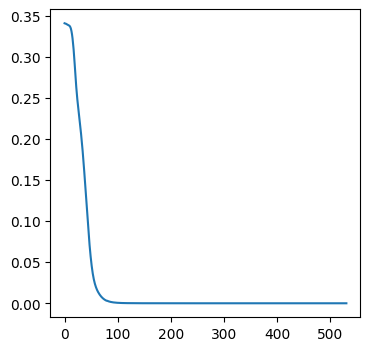

rho_preds.shape: (100, 4, 4)
t_f: 1.0
states.shape: (8, 100)
Relative l2 error rho_1_ee     : 8.500e-05
Relative l2 error rho_1_gg     : 1.901e-04
Relative l2 error rho_2_ee     : 1.960e-04
Relative l2 error rho_2_gg     : 6.824e-05
Relative l2 error coh_1_eg_re  : 4.811e-03
Relative l2 error coh_1_eg_im  : 2.151e-04
Relative l2 error coh_2_eg_re  : 4.606e-03
Relative l2 error coh_2_eg_im  : 1.673e-04
Final Time: 2.0
[ 2.83109337e-01  3.84120941e-01  1.72565401e-01  1.60146385e-01
  1.50387302e-01 -1.50490820e-01 -1.23596214e-01  1.23575300e-01
  1.24457151e-01 -1.24426559e-01 -2.46539399e-01  1.23297013e-02
 -1.30948126e-01  3.76970274e-06  9.90642756e-02 -5.01544960e-02]
tol :  0.01


 15%|█▌        | 7500/50000 [00:12<01:08, 616.48it/s, L=0.00313, RES=0.00313, W_min=0.991]


tol :  0.1


  5%|▌         | 2700/50000 [00:02<00:50, 929.95it/s, L=0.000336, RES=0.000336, W_min=0.99] 


tol :  1.0


 10%|█         | 5000/50000 [00:05<00:48, 930.12it/s, L=3.39e-5, RES=3.39e-5, W_min=0.99]   


tol :  10.0


 75%|███████▌  | 37500/50000 [00:40<00:13, 929.95it/s, L=3.45e-6, RES=3.45e-6, W_min=0.99] 


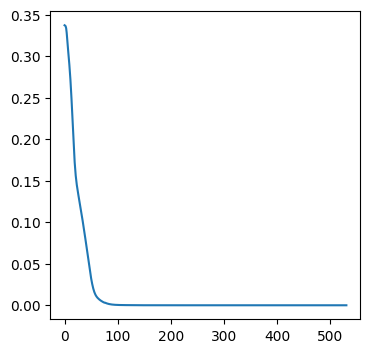

rho_preds.shape: (200, 4, 4)
t_f: 2.0
states.shape: (8, 200)
Relative l2 error rho_1_ee     : 8.755e-05
Relative l2 error rho_1_gg     : 1.450e-04
Relative l2 error rho_2_ee     : 1.666e-04
Relative l2 error rho_2_gg     : 8.224e-05
Relative l2 error coh_1_eg_re  : 2.813e-03
Relative l2 error coh_1_eg_im  : 2.547e-04
Relative l2 error coh_2_eg_re  : 1.888e-03
Relative l2 error coh_2_eg_im  : 2.182e-04
Final Time: 3.0
[ 1.82685152e-01  2.30462372e-01  3.48207206e-01  2.38574699e-01
 -6.91138208e-02  6.90995902e-02 -4.60043550e-02  4.59496379e-02
 -1.24486014e-01  1.24349907e-01 -4.36425805e-02  3.69438976e-02
 -1.71755388e-01  2.52529862e-05 -7.48875737e-02 -1.36579886e-01]
tol :  0.01


 14%|█▍        | 7200/50000 [00:11<01:11, 600.65it/s, L=0.00335, RES=0.00335, W_min=0.99] 


tol :  0.1


  6%|▌         | 2900/50000 [00:03<00:50, 931.96it/s, L=0.000315, RES=0.000315, W_min=0.991]


tol :  1.0


  7%|▋         | 3700/50000 [00:03<00:49, 932.15it/s, L=3.35e-5, RES=3.35e-5, W_min=0.99]   


tol :  10.0


 55%|█████▍    | 27300/50000 [00:29<00:24, 931.25it/s, L=3.45e-6, RES=3.45e-6, W_min=0.99] 


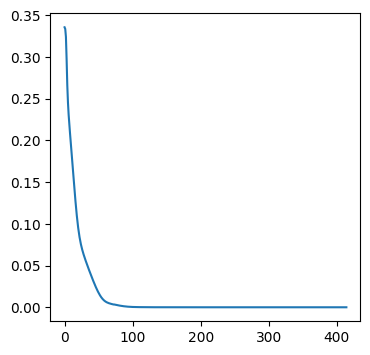

rho_preds.shape: (300, 4, 4)
t_f: 3.0
states.shape: (8, 300)
Relative l2 error rho_1_ee     : 1.334e-04
Relative l2 error rho_1_gg     : 1.534e-04
Relative l2 error rho_2_ee     : 2.015e-04
Relative l2 error rho_2_gg     : 1.063e-04
Relative l2 error coh_1_eg_re  : 3.042e-03
Relative l2 error coh_1_eg_im  : 6.669e-04
Relative l2 error coh_2_eg_re  : 1.450e-03
Relative l2 error coh_2_eg_im  : 2.671e-04
Final Time: 4.0
[ 1.8136892e-01  4.9770823e-01  1.2386154e-01  1.9691771e-01
  2.3138992e-02 -2.3171328e-02 -3.6823340e-03  3.8061291e-03
 -2.6205115e-02  2.6009582e-02 -6.6491067e-02 -7.9098381e-03
  1.9398764e-02 -8.9918554e-05  3.1222180e-02 -3.5291687e-02]
tol :  0.01


 14%|█▎        | 6800/50000 [00:11<01:13, 587.26it/s, L=0.00327, RES=0.00327, W_min=0.99] 


tol :  0.1


  7%|▋         | 3500/50000 [00:03<00:49, 930.95it/s, L=0.000318, RES=0.000318, W_min=0.991]


tol :  1.0


 10%|█         | 5100/50000 [00:05<00:48, 931.77it/s, L=3.34e-5, RES=3.34e-5, W_min=0.99]   


tol :  10.0


 19%|█▉        | 9500/50000 [00:10<00:43, 929.64it/s, L=3.27e-6, RES=3.27e-6, W_min=0.99] 


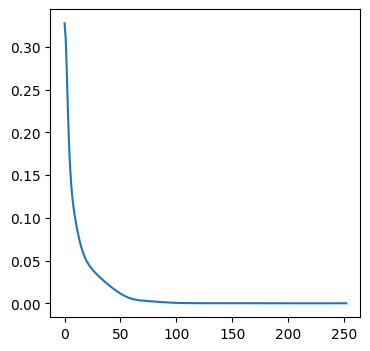

rho_preds.shape: (400, 4, 4)
t_f: 4.0
states.shape: (8, 400)
Relative l2 error rho_1_ee     : 2.179e-04
Relative l2 error rho_1_gg     : 1.679e-04
Relative l2 error rho_2_ee     : 1.775e-04
Relative l2 error rho_2_gg     : 1.769e-04
Relative l2 error coh_1_eg_re  : 2.927e-03
Relative l2 error coh_1_eg_im  : 7.500e-04
Relative l2 error coh_2_eg_re  : 1.935e-03
Relative l2 error coh_2_eg_im  : 3.604e-04
Final Time: 5.0
[ 2.85679609e-01  2.28377610e-01  2.71543443e-01  2.14248434e-01
 -4.60711047e-02  4.57910001e-02 -3.48708853e-02  3.49844433e-02
 -6.23530000e-02  6.24030717e-02  2.73677856e-02 -1.22119606e-01
  4.96954843e-03  2.83175032e-05 -5.23693562e-02 -2.97477469e-03]
tol :  0.01


 12%|█▏        | 6100/50000 [00:10<01:17, 564.24it/s, L=0.00319, RES=0.00319, W_min=0.991]


tol :  0.1


  8%|▊         | 4200/50000 [00:04<00:49, 929.68it/s, L=0.000314, RES=0.000314, W_min=0.991]


tol :  1.0


 13%|█▎        | 6500/50000 [00:06<00:46, 930.10it/s, L=3.38e-5, RES=3.38e-5, W_min=0.99]   


tol :  10.0


 17%|█▋        | 8500/50000 [00:09<00:44, 928.76it/s, L=3.42e-6, RES=3.42e-6, W_min=0.99] 


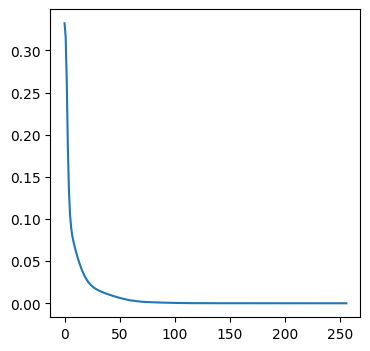

rho_preds.shape: (500, 4, 4)
t_f: 5.0
states.shape: (8, 500)
Relative l2 error rho_1_ee     : 2.070e-04
Relative l2 error rho_1_gg     : 2.192e-04
Relative l2 error rho_2_ee     : 1.717e-04
Relative l2 error rho_2_gg     : 2.090e-04
Relative l2 error coh_1_eg_re  : 2.981e-03
Relative l2 error coh_1_eg_im  : 8.043e-04
Relative l2 error coh_2_eg_re  : 2.735e-03
Relative l2 error coh_2_eg_im  : 3.652e-04
Final Time: 6.0
[ 2.2610138e-01  2.8949893e-01  2.4607567e-01  2.3800159e-01
  1.3798568e-02 -1.3869680e-02  1.6589276e-03 -1.5180521e-03
  4.1197345e-02 -4.1324724e-02 -1.8258780e-02 -5.3123504e-02
  8.8354319e-02  6.2481209e-05 -4.8441552e-02 -7.1823001e-02]
tol :  0.01


 11%|█         | 5600/50000 [00:10<01:21, 546.14it/s, L=0.00322, RES=0.00322, W_min=0.99] 


tol :  0.1


  8%|▊         | 4200/50000 [00:04<00:49, 928.41it/s, L=0.000337, RES=0.000337, W_min=0.99] 


tol :  1.0


 10%|█         | 5000/50000 [00:05<00:48, 927.71it/s, L=3.39e-5, RES=3.39e-5, W_min=0.99]   


tol :  10.0


 30%|███       | 15100/50000 [00:16<00:37, 927.43it/s, L=3.42e-6, RES=3.42e-6, W_min=0.99] 


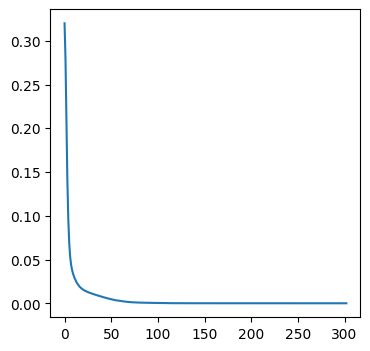

rho_preds.shape: (600, 4, 4)
t_f: 6.0
states.shape: (8, 600)
Relative l2 error rho_1_ee     : 2.653e-04
Relative l2 error rho_1_gg     : 2.214e-04
Relative l2 error rho_2_ee     : 2.038e-04
Relative l2 error rho_2_gg     : 2.299e-04
Relative l2 error coh_1_eg_re  : 2.988e-03
Relative l2 error coh_1_eg_im  : 8.033e-04
Relative l2 error coh_2_eg_re  : 2.730e-03
Relative l2 error coh_2_eg_im  : 4.358e-04
Final Time: 7.0
[ 2.3158935e-01  2.0513792e-01  3.1909958e-01  2.4366970e-01
 -1.6070265e-02  1.5985433e-02 -1.5602522e-03  1.6693454e-03
  2.0512136e-02 -2.0679496e-02 -1.3505664e-02 -6.0812742e-02
 -1.5114538e-02 -2.6868947e-05 -4.3191705e-02 -8.6770952e-04]
tol :  0.01


  7%|▋         | 3600/50000 [00:08<01:44, 442.25it/s, L=0.0032, RES=0.0032, W_min=0.99]   


tol :  0.1


  9%|▉         | 4500/50000 [00:04<00:48, 933.54it/s, L=0.000334, RES=0.000334, W_min=0.99] 


tol :  1.0


  9%|▉         | 4400/50000 [00:04<00:48, 933.26it/s, L=3.23e-5, RES=3.23e-5, W_min=0.991]  


tol :  10.0


 43%|████▎     | 21700/50000 [00:23<00:30, 932.71it/s, L=3.42e-6, RES=3.42e-6, W_min=0.99] 


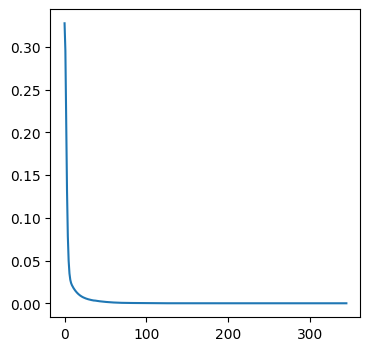

rho_preds.shape: (700, 4, 4)
t_f: 7.0
states.shape: (8, 700)
Relative l2 error rho_1_ee     : 2.992e-04
Relative l2 error rho_1_gg     : 3.056e-04
Relative l2 error rho_2_ee     : 3.220e-04
Relative l2 error rho_2_gg     : 2.515e-04
Relative l2 error coh_1_eg_re  : 3.312e-03
Relative l2 error coh_1_eg_im  : 8.396e-04
Relative l2 error coh_2_eg_re  : 2.705e-03
Relative l2 error coh_2_eg_im  : 4.480e-04
Final Time: 8.0
[ 2.7070737e-01  2.4797502e-01  2.5114822e-01  2.2958505e-01
  7.0929341e-03 -7.1546286e-03 -5.4774396e-03  5.4810899e-03
  2.6903758e-02 -2.6967812e-02 -6.9207855e-02 -1.1786148e-03
  1.6303360e-02 -3.3137039e-06 -2.7662992e-02 -4.2407062e-02]
tol :  0.01


  7%|▋         | 3500/50000 [00:07<01:45, 441.81it/s, L=0.00326, RES=0.00326, W_min=0.99] 


tol :  0.1


  8%|▊         | 4200/50000 [00:04<00:49, 931.49it/s, L=0.000322, RES=0.000322, W_min=0.99] 


tol :  1.0


  9%|▊         | 4300/50000 [00:04<00:49, 930.79it/s, L=3.25e-5, RES=3.25e-5, W_min=0.99]   


tol :  10.0


 27%|██▋       | 13600/50000 [00:14<00:39, 931.02it/s, L=3.39e-6, RES=3.39e-6, W_min=0.99] 


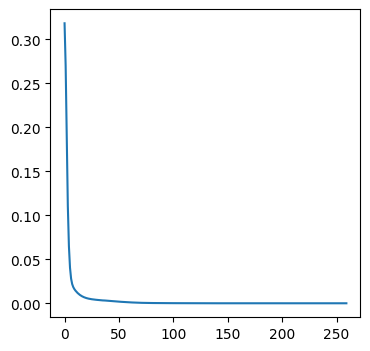

rho_preds.shape: (800, 4, 4)
t_f: 8.0
states.shape: (8, 800)
Relative l2 error rho_1_ee     : 3.351e-04
Relative l2 error rho_1_gg     : 3.760e-04
Relative l2 error rho_2_ee     : 3.340e-04
Relative l2 error rho_2_gg     : 3.543e-04
Relative l2 error coh_1_eg_re  : 3.356e-03
Relative l2 error coh_1_eg_im  : 8.999e-04
Relative l2 error coh_2_eg_re  : 2.778e-03
Relative l2 error coh_2_eg_im  : 4.679e-04


In [21]:
loss = []
res = []

for k in range(int(T/t1)):

    # initialize model
    print('Final Time: {}'.format( (k+1) * t1))
    
    print(state0)
    
    model = PINN(layers, state0, t0, t1, tol, H, sigmam, gamma)

    for tol in tol_list:
        model.tol = tol
        print('tol : ', model.tol)

        model.train(nIter=50000)

    params = model.get_params(model.opt_state)
    rho_pred = model.predict_u(params, t)

    rho = model.neural_net(params, model.t1)
    state0 = get_state0(onp.asarray(rho))

    # store predictions
    rho_pred_list.append(rho_pred)
    losses_list.append(model.loss_res_log)

    # store params
    flat_params, _ = ravel_pytree(params)
    params_list.append(flat_params)

    np.save('rho_pred_list.npy', rho_pred_list)
    np.save('params_list.npy', params_list)
    np.save('losses_list.npy', onp.array(losses_list, dtype=object), allow_pickle=True)

    plt.figure(figsize=(4, 4))
    plt.plot(np.arange(0, len(model.loss_log), 1),model.loss_log)
    plt.show()
    #error
    #Build host (NumPy) concatenated predictions

    loss.append(model.loss_log)
    res.append(model.loss_res_log)

    # === 1) build rho_preds along time axis ===
    # Each element in rho_pred_list should be shape (n_time_chunk, 4, 4)
    rho_preds = np.concatenate([np.asarray(x) for x in rho_pred_list], axis=0)  # shape (N_time,4,4)
    print("rho_preds.shape:", rho_preds.shape)

    # === 2) find indices and slice df consistently (include idx_t1) ===
    idx_t0 = df.index[df['time'] == t0][0]
    t_f = onp.round((k+1) * t1, 2)
    print("t_f:", t_f)
    idx_t1 = df.index[df['time'] == t_f][0]

    # include idx_t1 in slice -> use idx_t1+1 for Python slice
    df_slice = df.iloc[idx_t0: idx_t1]

    # === 3) build states from the dataframe slice ===
    states = np.array([
        df_slice['rho_1_ee'].values,
        df_slice['rho_2_ee'].values,
        df_slice['rho_1_gg'].values,
        df_slice['rho_2_gg'].values,
        df_slice['coh_1_eg'].values.real,
        df_slice['coh_1_eg'].values.imag,
        df_slice['coh_2_eg'].values.real,
        df_slice['coh_2_eg'].values.imag
    ])  # shape (8, N_time)
    print("states.shape:", states.shape)

    # === 4) sanity-check time lengths match ===
    N_pred = rho_preds.shape[0]
    N_true = states.shape[1]
    if N_pred != N_true:
        raise RuntimeError(f"Mismatch in time-lengths: predictions={N_pred}, ground-truth={N_true}."
                        " Check concatenation axis and df slicing (inclusive/exclusive).")

    # === 5) compute target arrays from rho_preds ===
    true_rho1_ee = np.real(rho_preds[:, 2, 2] + rho_preds[:, 3, 3])   # (N_time,)
    true_rho1_gg = np.real(rho_preds[:, 0, 0] + rho_preds[:, 1, 1])
    true_rho2_ee = np.real(rho_preds[:, 1, 1] + rho_preds[:, 3, 3])
    true_rho2_gg = np.real(rho_preds[:, 0, 0] + rho_preds[:, 2, 2])

    true_coh1 = rho_preds[:, 2, 0] + rho_preds[:, 3, 1]   # complex (N_time,)
    true_coh1_re = np.real(true_coh1)
    true_coh1_im = np.imag(true_coh1)

    true_coh2 = rho_preds[:, 1, 0] + rho_preds[:, 3, 2]
    true_coh2_re = np.real(true_coh2)
    true_coh2_im = np.imag(true_coh2)

    # === 6) compute relative L2 errors (with correct denominators) ===
    eps = 1e-12

    err_rho_1_ee   = np.linalg.norm(true_rho1_ee - states[0, :]) / (np.linalg.norm(states[0, :]) + eps)
    err_rho_2_ee   = np.linalg.norm(true_rho2_ee - states[1, :]) / (np.linalg.norm(states[1, :]) + eps)
    err_rho_1_gg   = np.linalg.norm(true_rho1_gg - states[2, :]) / (np.linalg.norm(states[2, :]) + eps)
    err_rho_2_gg   = np.linalg.norm(true_rho2_gg - states[3, :]) / (np.linalg.norm(states[3, :]) + eps)

    # NOTE: use the coherence rows as denominators (states[4], states[5], ...)
    err_coh_1_eg_re = np.linalg.norm(true_coh1_re - states[4, :]) / (np.linalg.norm(states[4, :]) + eps)
    err_coh_1_eg_im = np.linalg.norm(true_coh1_im - states[5, :]) / (np.linalg.norm(states[5, :]) + eps)
    err_coh_2_eg_re = np.linalg.norm(true_coh2_re - states[6, :]) / (np.linalg.norm(states[6, :]) + eps)
    err_coh_2_eg_im = np.linalg.norm(true_coh2_im - states[7, :]) / (np.linalg.norm(states[7, :]) + eps)

    print('Relative l2 error rho_1_ee     : {:.3e}'.format(err_rho_1_ee))
    print('Relative l2 error rho_1_gg     : {:.3e}'.format(err_rho_1_gg))
    print('Relative l2 error rho_2_ee     : {:.3e}'.format(err_rho_2_ee))
    print('Relative l2 error rho_2_gg     : {:.3e}'.format(err_rho_2_gg))

    print('Relative l2 error coh_1_eg_re  : {:.3e}'.format(err_coh_1_eg_re))
    print('Relative l2 error coh_1_eg_im  : {:.3e}'.format(err_coh_1_eg_im))
    print('Relative l2 error coh_2_eg_re  : {:.3e}'.format(err_coh_2_eg_re))
    print('Relative l2 error coh_2_eg_im  : {:.3e}'.format(err_coh_2_eg_im))




/tmp/ipykernel_22039/3061285983.py:125: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(t_axis, onp.abs(coh1_pred), '--', label='coh1 pred |.|', linestyle=':')
/tmp/ipykernel_22039/3061285983.py:149: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(t_axis, onp.abs(coh2_pred), '--', label='coh2 pred |.|', linestyle=':')


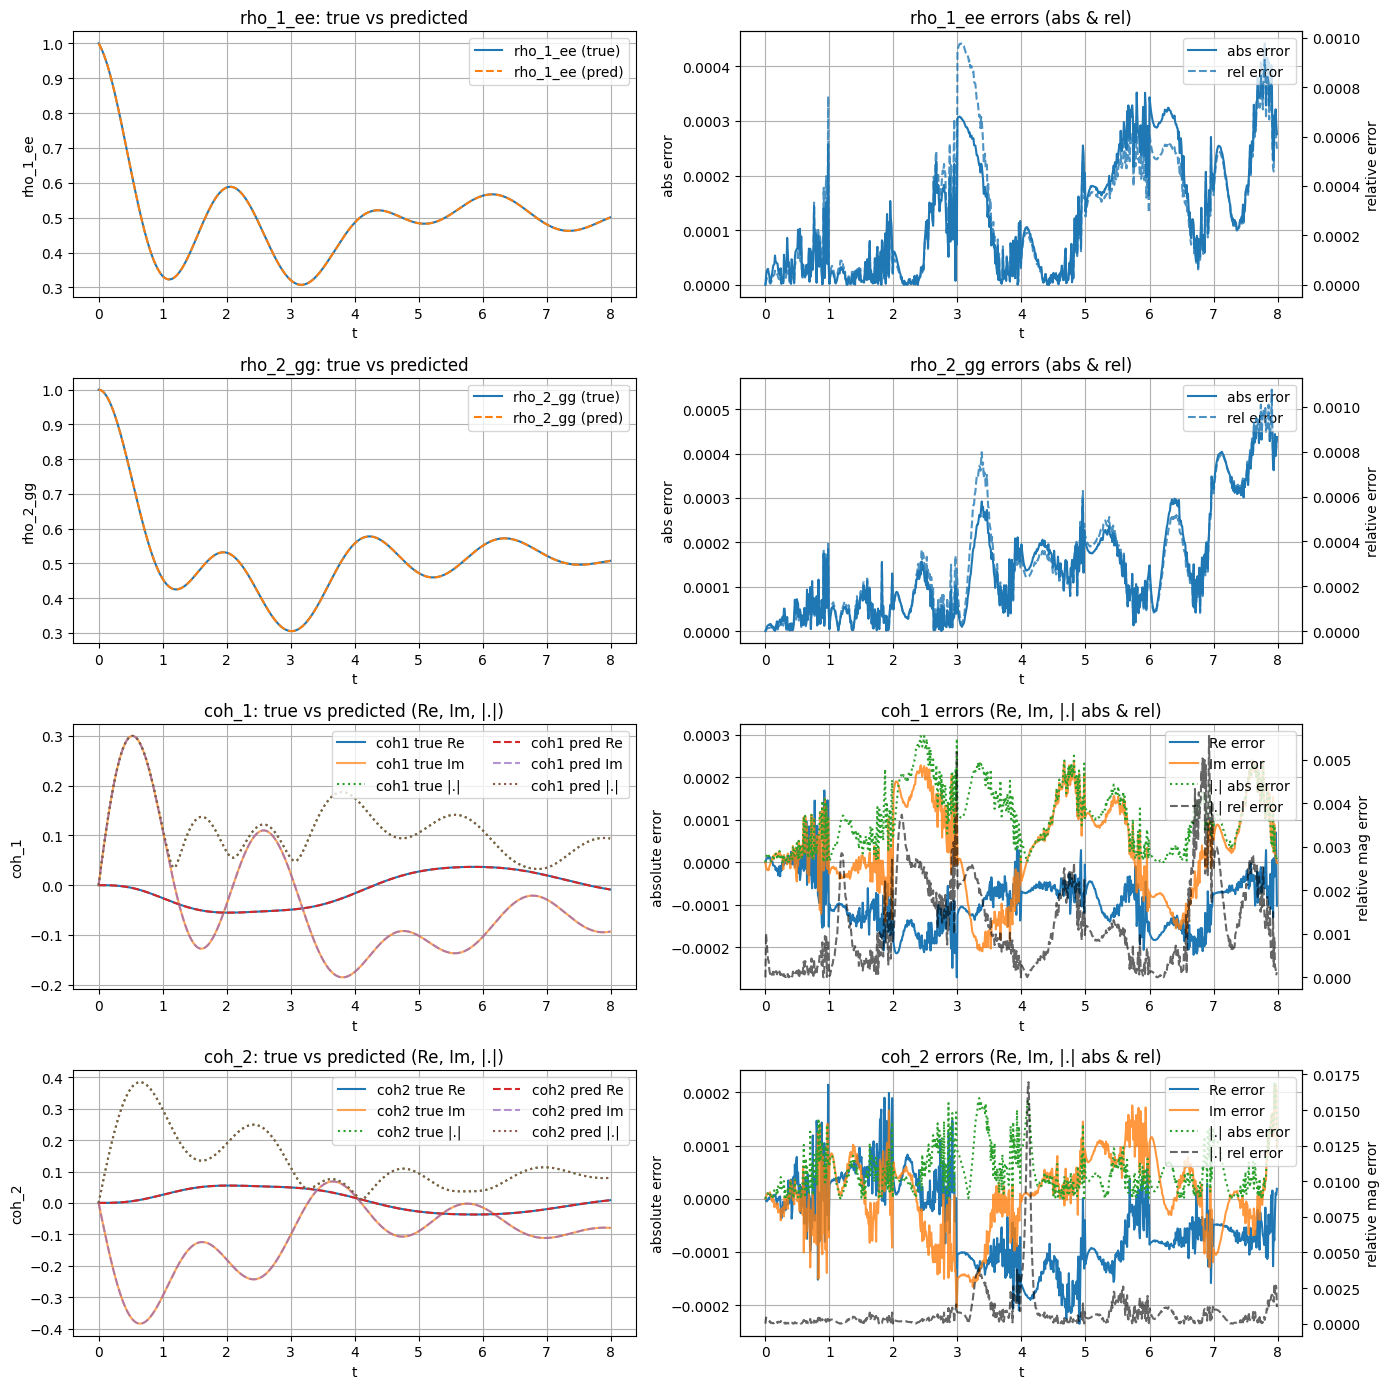

In [ ]:
import numpy as onp
import matplotlib.pyplot as plt
import jax

def to_host(a):
    try:
        return onp.asarray(jax.device_get(a))
    except Exception:
        return onp.asarray(a)

rho_preds = to_host(rho_preds)                 # shape (N_pred,4,4)
t_axis = to_host(onp.asarray(df_slice['time'].values))

# true values from df_slice
rho1_ee_true = to_host(onp.asarray(df_slice['rho_1_ee'].values))
rho2_gg_true = to_host(onp.asarray(df_slice['rho_2_gg'].values))
# coherences: accept complex dtype or build from re/imag columns
if 'coh_1_eg' in df_slice.columns:
    coh1_true = to_host(onp.asarray(df_slice['coh_1_eg'].values.astype(complex)))
else:
    coh1_true = (to_host(onp.asarray(df_slice['coh_1_eg_re'].values)) +
                 1j * to_host(onp.asarray(df_slice['coh_1_eg_im'].values)))

if 'coh_2_eg' in df_slice.columns:
    coh2_true = to_host(onp.asarray(df_slice['coh_2_eg'].values.astype(complex)))
else:
    coh2_true = (to_host(onp.asarray(df_slice['coh_2_eg_re'].values)) +
                 1j * to_host(onp.asarray(df_slice['coh_2_eg_im'].values)))

# predicted values from rho_preds
rho1_ee_pred = to_host(onp.real(rho_preds[:, 2, 2] + rho_preds[:, 3, 3]))
rho2_gg_pred = to_host(onp.real(rho_preds[:, 0, 0] + rho_preds[:, 2, 2]))
coh1_pred = to_host(rho_preds[:, 2, 0] + rho_preds[:, 3, 1])
coh2_pred = to_host(rho_preds[:, 1, 0] + rho_preds[:, 3, 2])

# align lengths (trim to min length if mismatch)
N_pred = rho1_ee_pred.shape[0]
N_true = rho1_ee_true.shape[0]
if N_pred != N_true:
    N_min = min(N_pred, N_true)
    print(f"Warning: trimming to N_min={N_min} (pred={N_pred}, true={N_true})")
    rho1_ee_pred = rho1_ee_pred[:N_min]
    rho2_gg_pred = rho2_gg_pred[:N_min]
    coh1_pred = coh1_pred[:N_min]
    coh2_pred = coh2_pred[:N_min]

    rho1_ee_true = rho1_ee_true[:N_min]
    rho2_gg_true = rho2_gg_true[:N_min]
    coh1_true = coh1_true[:N_min]
    coh2_true = coh2_true[:N_min]
    t_axis = t_axis[:N_min]

# small regulariser to avoid div-by-zero in relative error
eps = 1e-12

# compute errors
err_rho1_abs = onp.abs(rho1_ee_pred - rho1_ee_true)
err_rho1_rel = err_rho1_abs / (onp.abs(rho1_ee_true) + eps)

err_rho2_abs = onp.abs(rho2_gg_pred - rho2_gg_true)
err_rho2_rel = err_rho2_abs / (onp.abs(rho2_gg_true) + eps)

# coherences: separate real, imag, magnitude errors
err_coh1_re = onp.real(coh1_pred) - onp.real(coh1_true)
err_coh1_im = onp.imag(coh1_pred) - onp.imag(coh1_true)
err_coh1_mag = onp.abs(onp.abs(coh1_pred) - onp.abs(coh1_true))
err_coh1_rel_mag = err_coh1_mag / (onp.abs(coh1_true) + eps)

err_coh2_re = onp.real(coh2_pred) - onp.real(coh2_true)
err_coh2_im = onp.imag(coh2_pred) - onp.imag(coh2_true)
err_coh2_mag = onp.abs(onp.abs(coh2_pred) - onp.abs(coh2_true))
err_coh2_rel_mag = err_coh2_mag / (onp.abs(coh2_true) + eps)

# === Plotting layout: 4 rows x 2 cols ===
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Row 0: rho_1_ee (left: true vs pred, right: abs + rel error)
ax = axes[0, 0]
ax.plot(t_axis, rho1_ee_true, label='rho_1_ee (true)')
ax.plot(t_axis, rho1_ee_pred, '--', label='rho_1_ee (pred)')
ax.set_title('rho_1_ee: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel('rho_1_ee'); ax.grid(True); ax.legend()

ax_err = axes[0, 1]
ax_err.plot(t_axis, err_rho1_abs, label='abs error')
ax_err.set_xlabel('t'); ax_err.set_ylabel('abs error')
ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_rho1_rel, '--', label='rel error', alpha=0.8)
ax2.set_ylabel('relative error')
# combine legends
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('rho_1_ee errors (abs & rel)')

# Row 1: rho_2_gg
ax = axes[1, 0]
ax.plot(t_axis, rho2_gg_true, label='rho_2_gg (true)')
ax.plot(t_axis, rho2_gg_pred, '--', label='rho_2_gg (pred)')
ax.set_title('rho_2_gg: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel('rho_2_gg'); ax.grid(True); ax.legend()

ax_err = axes[1, 1]
ax_err.plot(t_axis, err_rho2_abs, label='abs error')
ax_err.set_xlabel('t'); ax_err.set_ylabel('abs error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_rho2_rel, '--', label='rel error', alpha=0.8)
ax2.set_ylabel('relative error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('rho_2_gg errors (abs & rel)')

# Row 2: coh_1 (left: real, imag, |.|; right: errors of Re, Im, |.|)
ax = axes[2, 0]
ax.plot(t_axis, onp.real(coh1_true), label='coh1 true Re')
ax.plot(t_axis, onp.imag(coh1_true), label='coh1 true Im', alpha=0.7)
ax.plot(t_axis, onp.abs(coh1_true), label='coh1 true |.|', linestyle=':')
ax.plot(t_axis, onp.real(coh1_pred), '--', label='coh1 pred Re')
ax.plot(t_axis, onp.imag(coh1_pred), '--', label='coh1 pred Im', alpha=0.7)
ax.plot(t_axis, onp.abs(coh1_pred), '--', label='coh1 pred |.|', linestyle=':')
ax.set_title('coh_1: true vs predicted (Re, Im, |.|)')
ax.set_xlabel('t'); ax.set_ylabel('coh_1'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[2, 1]
ax_err.plot(t_axis, err_coh1_re, label='Re error')
ax_err.plot(t_axis, err_coh1_im, label='Im error', alpha=0.8)
ax_err.plot(t_axis, err_coh1_mag, label='|.| abs error', linestyle=':')
ax_err.set_xlabel('t'); ax_err.set_ylabel('absolute error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_coh1_rel_mag, '--', label='|.| rel error', color='k', alpha=0.6)
ax2.set_ylabel('relative mag error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('coh_1 errors (Re, Im, |.| abs & rel)')

# Row 3: coh_2
ax = axes[3, 0]
ax.plot(t_axis, onp.real(coh2_true), label='coh2 true Re')
ax.plot(t_axis, onp.imag(coh2_true), label='coh2 true Im', alpha=0.7)
ax.plot(t_axis, onp.abs(coh2_true), label='coh2 true |.|', linestyle=':')
ax.plot(t_axis, onp.real(coh2_pred), '--', label='coh2 pred Re')
ax.plot(t_axis, onp.imag(coh2_pred), '--', label='coh2 pred Im', alpha=0.7)
ax.plot(t_axis, onp.abs(coh2_pred), '--', label='coh2 pred |.|', linestyle=':')
ax.set_title('coh_2: true vs predicted (Re, Im, |.|)')
ax.set_xlabel('t'); ax.set_ylabel('coh_2'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[3, 1]
ax_err.plot(t_axis, err_coh2_re, label='Re error')
ax_err.plot(t_axis, err_coh2_im, label='Im error', alpha=0.8)
ax_err.plot(t_axis, err_coh2_mag, label='|.| abs error', linestyle=':')
ax_err.set_xlabel('t'); ax_err.set_ylabel('absolute error'); ax_err.grid(True)
ax2 = ax_err.twinx()
ax2.plot(t_axis, err_coh2_rel_mag, '--', label='|.| rel error', color='k', alpha=0.6)
ax2.set_ylabel('relative mag error')
lines, labels = ax_err.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax_err.legend(lines + lines2, labels + labels2, loc='upper right')
ax_err.set_title('coh_2 errors (Re, Im, |.| abs & rel)')

plt.tight_layout()
plt.show()


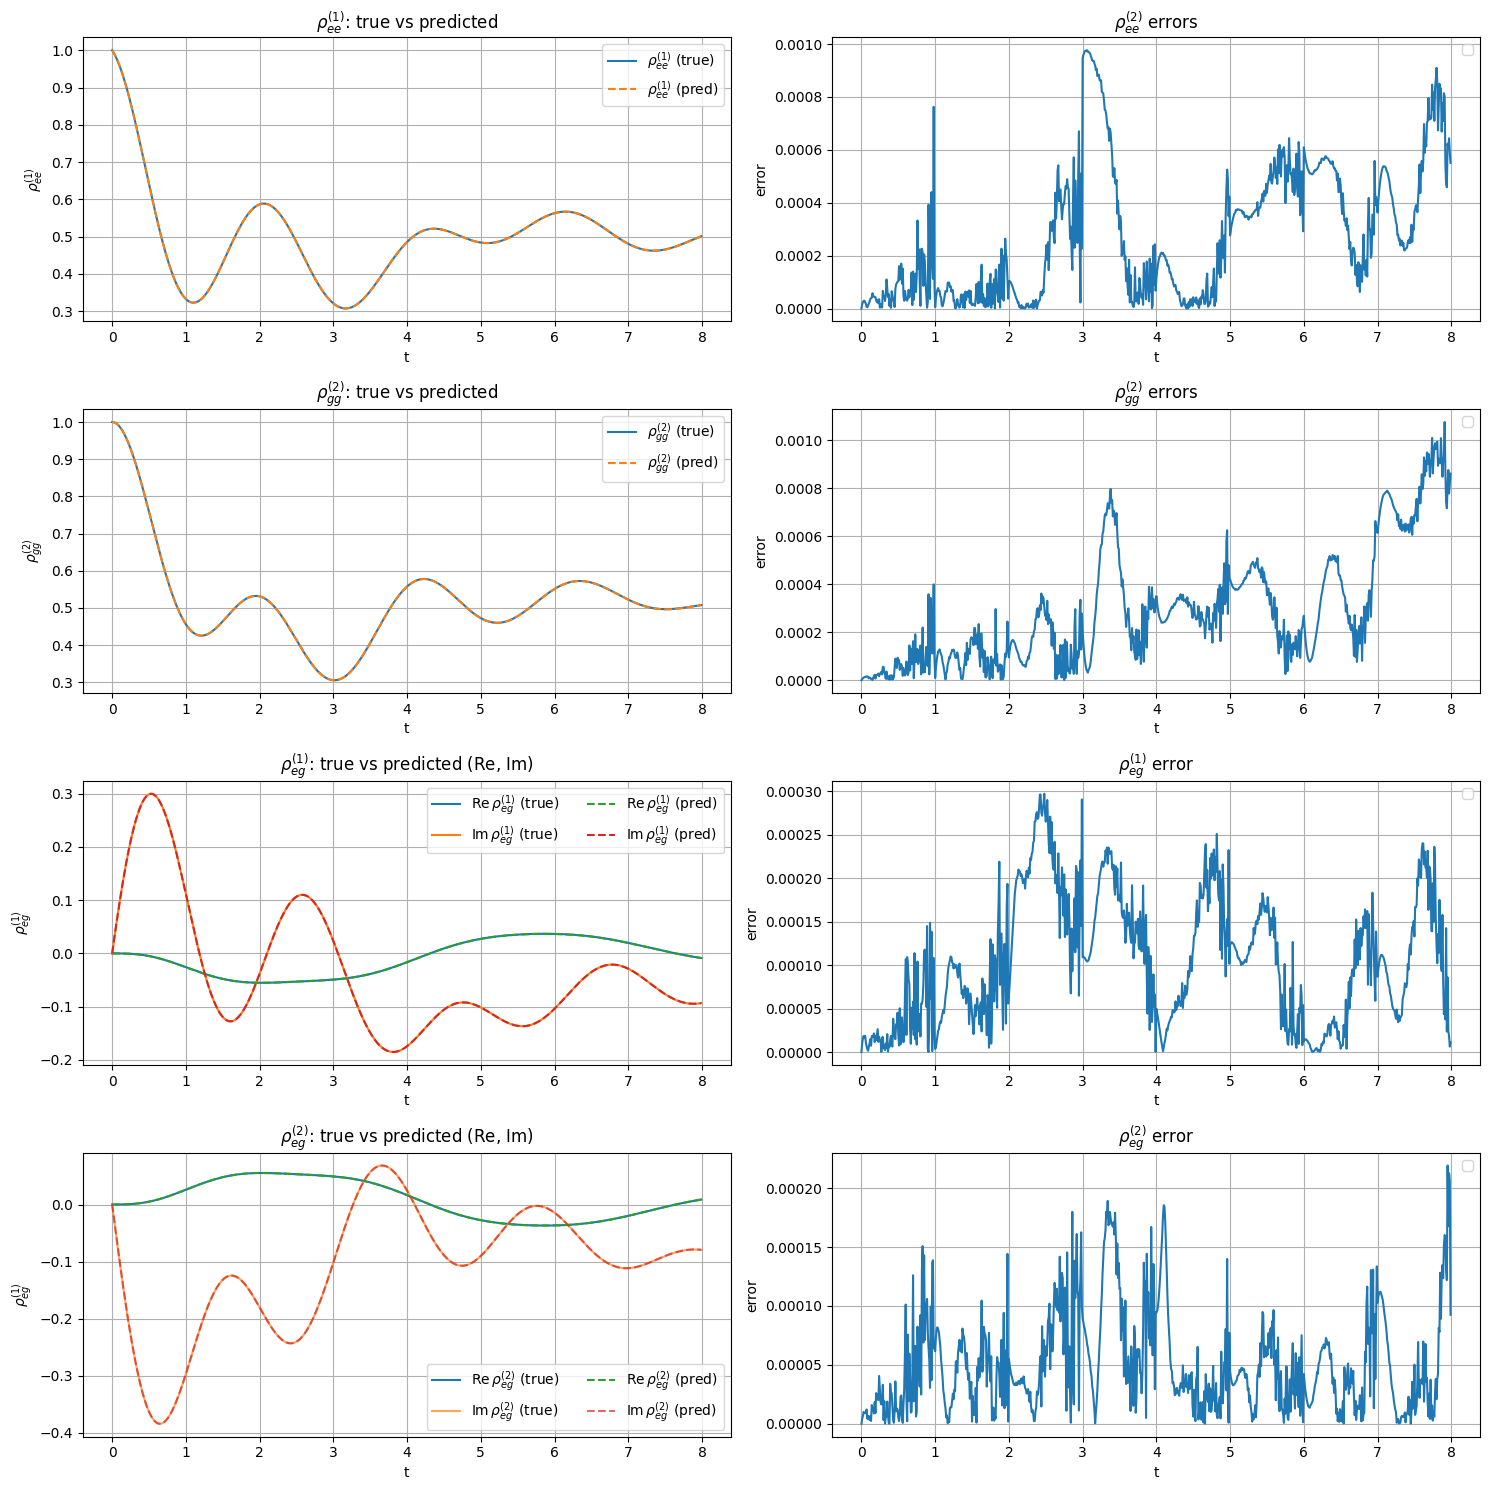

In [23]:
import numpy as onp
import matplotlib.pyplot as plt
import jax

# --- helper (use your existing to_host if you already have it) ---
def to_host(a):
    try:
        return onp.asarray(jax.device_get(a))
    except Exception:
        return onp.asarray(a)

# === prepare arrays (replace names if yours differ) ===
rho_preds = to_host(rho_preds)                 # shape (N_pred,4,4)
t_axis = to_host(onp.asarray(df_slice['time'].values))

# true values from df_slice
rho1_ee_true = to_host(onp.asarray(df_slice['rho_1_ee'].values))
rho2_gg_true = to_host(onp.asarray(df_slice['rho_2_gg'].values))
# coherences: accept complex dtype or build from re/imag columns
if 'coh_1_eg' in df_slice.columns:
    coh1_true = to_host(onp.asarray(df_slice['coh_1_eg'].values.astype(complex)))
else:
    coh1_true = (to_host(onp.asarray(df_slice['coh_1_eg_re'].values)) +
                 1j * to_host(onp.asarray(df_slice['coh_1_eg_im'].values)))

if 'coh_2_eg' in df_slice.columns:
    coh2_true = to_host(onp.asarray(df_slice['coh_2_eg'].values.astype(complex)))
else:
    coh2_true = (to_host(onp.asarray(df_slice['coh_2_eg_re'].values)) +
                 1j * to_host(onp.asarray(df_slice['coh_2_eg_im'].values)))

# predicted values from rho_preds
rho1_ee_pred = to_host(onp.real(rho_preds[:, 2, 2] + rho_preds[:, 3, 3]))
rho2_gg_pred = to_host(onp.real(rho_preds[:, 0, 0] + rho_preds[:, 2, 2]))
coh1_pred = to_host(rho_preds[:, 2, 0] + rho_preds[:, 3, 1])
coh2_pred = to_host(rho_preds[:, 1, 0] + rho_preds[:, 3, 2])

# align lengths (trim to min length if mismatch)
N_pred = rho1_ee_pred.shape[0]
N_true = rho1_ee_true.shape[0]
if N_pred != N_true:
    N_min = min(N_pred, N_true)
    print(f"Warning: trimming to N_min={N_min} (pred={N_pred}, true={N_true})")
    rho1_ee_pred = rho1_ee_pred[:N_min]
    rho2_gg_pred = rho2_gg_pred[:N_min]
    coh1_pred = coh1_pred[:N_min]
    coh2_pred = coh2_pred[:N_min]

    rho1_ee_true = rho1_ee_true[:N_min]
    rho2_gg_true = rho2_gg_true[:N_min]
    coh1_true = coh1_true[:N_min]
    coh2_true = coh2_true[:N_min]
    t_axis = t_axis[:N_min]

# small regulariser to avoid div-by-zero in error
eps = 1e-12

# compute errors
err_rho1_abs = onp.abs(rho1_ee_pred - rho1_ee_true)
err_rho1_rel = err_rho1_abs / (onp.abs(rho1_ee_true) + eps)

err_rho2_abs = onp.abs(rho2_gg_pred - rho2_gg_true)
err_rho2_rel = err_rho2_abs / (onp.abs(rho2_gg_true) + eps)

# coherences: separate real, imag, magnitude errors
err_coh1_re = onp.real(coh1_pred) - onp.real(coh1_true)
err_coh1_im = onp.imag(coh1_pred) - onp.imag(coh1_true)
err_coh1_mag = onp.abs(onp.abs(coh1_pred) - onp.abs(coh1_true))
err_coh1_rel_mag = err_coh1_mag / (onp.abs(coh1_true) + eps)

err_coh2_re = onp.real(coh2_pred) - onp.real(coh2_true)
err_coh2_im = onp.imag(coh2_pred) - onp.imag(coh2_true)
err_coh2_mag = onp.abs(onp.abs(coh2_pred) - onp.abs(coh2_true))
err_coh2_rel_mag = err_coh2_mag / (onp.abs(coh2_true) + eps)

# === Plotting layout: 4 rows x 2 cols ===
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Row 0: rho_1_ee (left: true vs pred, right: abs + rel error)
ax = axes[0, 0]
ax.plot(t_axis, rho1_ee_true, label=r'$\rho^{(1)}_{ee}$ (true)')
ax.plot(t_axis, rho1_ee_pred, '--', label=r'$\rho^{(1)}_{ee}$ (pred)')
ax.set_title(r'$\rho^{(1)}_{ee}$: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel(r'$\rho^{(1)}_{ee}$'); ax.grid(True); ax.legend()

ax_err = axes[0, 1]
ax_err.set_xlabel('t')
ax_err.grid(True)
ax_err.plot(t_axis, err_rho1_rel)
ax_err.set_ylabel('error')
lines2, labels2 = ax_err.get_legend_handles_labels()
ax_err.legend(lines2, labels2, loc='upper right')
ax_err.set_title(r'$\rho^{(2)}_{ee}$ errors')

ax = axes[1, 0]
ax.plot(t_axis, rho2_gg_true, label=r'$\rho^{(2)}_{gg}$ (true)')
ax.plot(t_axis, rho2_gg_pred, '--', label=r'$\rho^{(2)}_{gg}$ (pred)')
ax.set_title(r'$\rho^{(2)}_{gg}$: true vs predicted')
ax.set_xlabel('t'); ax.set_ylabel(r'$\rho^{(2)}_{gg}$'); ax.grid(True); ax.legend()

ax_err = axes[1, 1]
ax_err.set_xlabel('t')
ax_err.grid(True)
ax_err.plot(t_axis, err_rho2_rel)
ax_err.set_ylabel('error')
lines2, labels2 = ax_err.get_legend_handles_labels()
ax_err.legend(lines2, labels2, loc='upper right')
ax_err.set_title(r'$\rho^{(2)}_{gg}$ errors')

ax = axes[2, 0]
ax.plot(t_axis, onp.real(coh1_true), label=r'$\mathrm{Re}\,\rho^{(1)}_{eg}$ (true)')
ax.plot(t_axis, onp.imag(coh1_true), label=r'$\mathrm{Im}\,\rho^{(1)}_{eg}$ (true)')
ax.plot(t_axis, onp.real(coh1_pred), '--', label=r'$\mathrm{Re}\,\rho^{(1)}_{eg}$ (pred)')
ax.plot(t_axis, onp.imag(coh1_pred), '--', label=r'$\mathrm{Im}\,\rho^{(1)}_{eg}$ (pred)')
ax.set_title(r'$\rho^{(1)}_{eg}$: true vs predicted (Re, Im)')
ax.set_xlabel('t'); ax.set_ylabel(r'$\rho^{(1)}_{eg}$'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[2, 1]
ax_err.set_xlabel('t')
ax_err.grid(True)
ax_err.plot(t_axis, err_coh1_mag)
ax_err.set_ylabel('error')
lines2, labels2 = ax_err.get_legend_handles_labels()
ax_err.legend(lines2, labels2, loc='upper right')
ax_err.set_title(r'$\rho^{(1)}_{eg}$ error')

ax = axes[3, 0]
ax.plot(t_axis, onp.real(coh2_true), label=r'$\mathrm{Re}\,\rho^{(2)}_{eg}$ (true)')
ax.plot(t_axis, onp.imag(coh2_true), label=r'$\mathrm{Im}\,\rho^{(2)}_{eg}$ (true)', alpha=0.7)
ax.plot(t_axis, onp.real(coh2_pred), '--', label=r'$\mathrm{Re}\,\rho^{(2)}_{eg}$ (pred)')
ax.plot(t_axis, onp.imag(coh2_pred), '--', label=r'$\mathrm{Im}\,\rho^{(2)}_{eg}$ (pred)', alpha=0.7)
ax.set_title(r'$\rho^{(2)}_{eg}$: true vs predicted (Re, Im)')
ax.set_xlabel('t'); ax.set_ylabel(r'$\rho^{(1)}_{eg}$'); ax.grid(True); ax.legend(ncol=2)

ax_err = axes[3, 1]
ax_err.set_xlabel('t')
ax_err.grid(True)
ax_err.plot(t_axis, err_coh2_mag)
ax_err.set_ylabel('error')
lines2, labels2 = ax_err.get_legend_handles_labels()
ax_err.legend(lines2, labels2, loc='upper right')
ax_err.set_title(r'$\rho^{(2)}_{eg}$ error')

plt.tight_layout()
plt.show()


# Cheeky Plots Dos
<hr/>

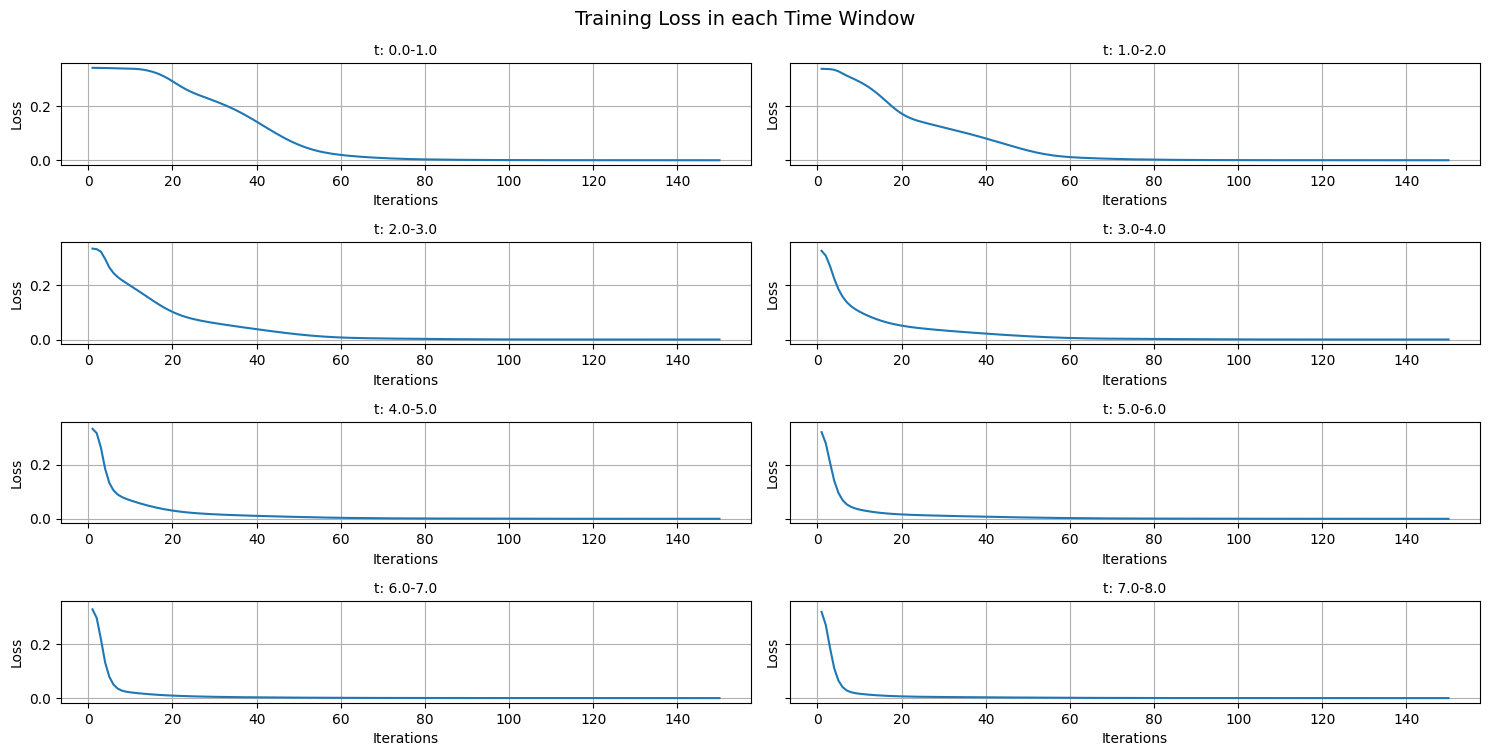

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(15, 15), sharex=False, sharey=True)

axes = axes.flatten()

for i, h in enumerate(loss):
    x = onp.arange(1, len(h) + 1)
    axes[i].plot(x[:150], h[:150], linewidth=1.5, color='C0')
    axes[i].set_title(f't: {i}.0-{i+1}.0', fontsize=10)
    axes[i].grid(True)
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('Loss')

for j in range(len(loss), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Training Loss in each Time Window', fontsize=14, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

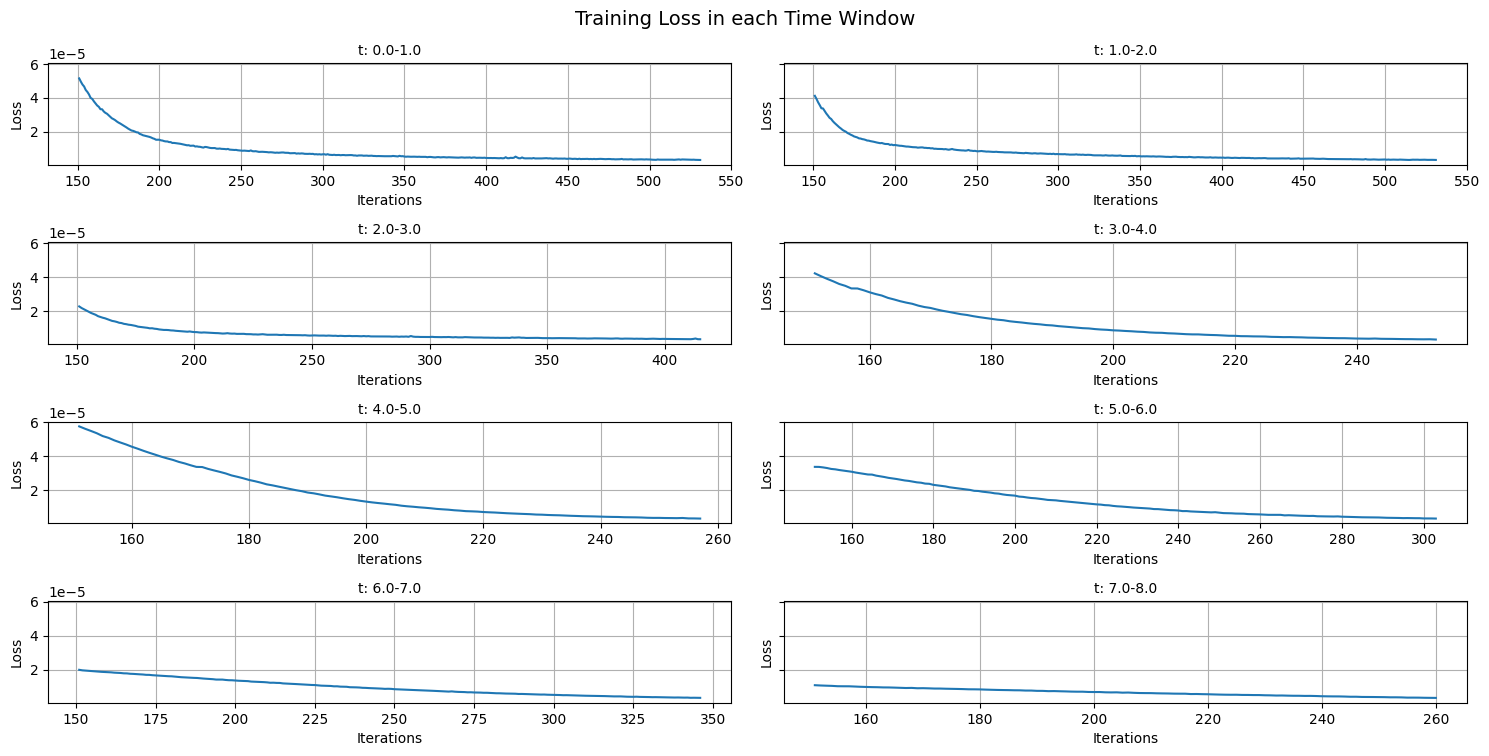

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(15, 15), sharex=False, sharey=True)

axes = axes.flatten()

for i, h in enumerate(loss):
    x = onp.arange(1, len(h) + 1)
    axes[i].plot(x[150:], h[150:], linewidth=1.5, color='C0')
    axes[i].set_title(f't: {i}.0-{i+1}.0', fontsize=10)
    axes[i].grid(True)
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('Loss')

for j in range(len(loss), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Training Loss in each Time Window', fontsize=14, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

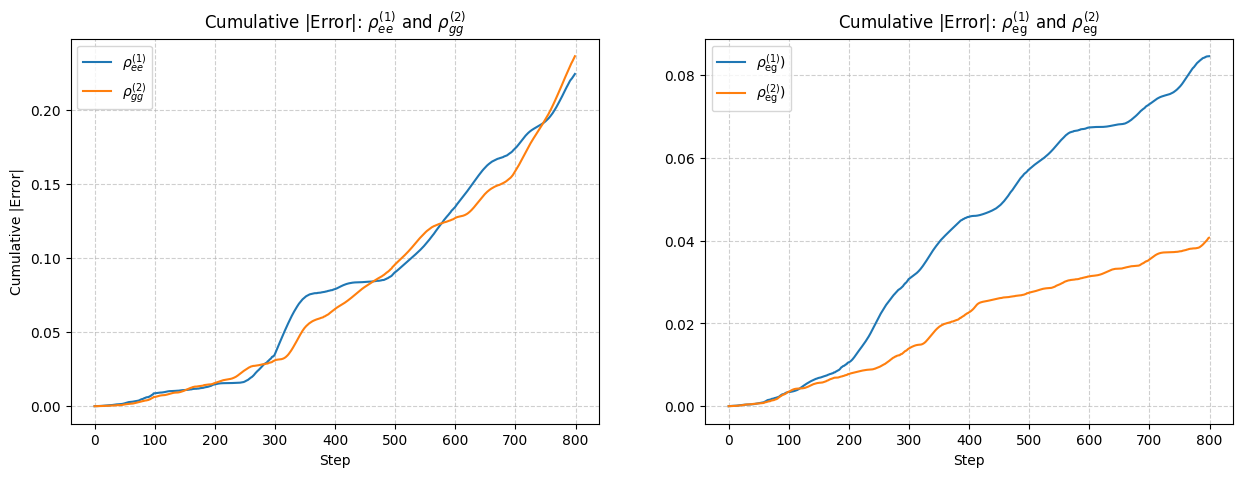

In [ ]:
import numpy as onp
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

cum_rho1_errs = onp.cumsum(onp.abs(err_rho1_rel))
cum_rho2_errs = onp.cumsum(onp.abs(err_rho2_rel))

cum_cho1_mag_errs = onp.cumsum(onp.abs(err_coh1_mag))

cum_cho2_mag_errs = onp.cumsum(onp.abs(err_coh2_mag))

ax = axes[0]
ax.plot(cum_rho1_errs, label=r'$\rho^{(1)}_{ee}$')
ax.plot(cum_rho2_errs, label=r'$\rho^{(2)}_{gg}$')
ax.set_title(r'Cumulative |Error|: $\rho^{(1)}_{ee}$ and $\rho^{(2)}_{gg}$')
ax.set_xlabel('Step')
ax.set_ylabel('Cumulative |Error|')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

ax = axes[1]
ax.plot(cum_cho1_mag_errs, label=r'$\rho^{(1)}_{\text{eg}})$')
ax.plot(cum_cho2_mag_errs, label=r'$\rho^{(2)}_{\text{eg}})$')
ax.set_title(r'Cumulative |Error|: $\rho^{(1)}_{\text{eg}}$ and $\rho^{(2)}_{\text{eg}}$')
ax.set_xlabel('Step')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)




In [27]:
print(onp.mean(err_rho1_rel))
print(onp.var(err_rho1_rel))
print(' ')
print(onp.mean(err_rho2_rel))
print(onp.var(err_rho2_rel))
print(' ')
print(onp.mean(err_coh1_mag))
print(onp.var(err_coh1_mag))
print(' ')
print(onp.mean(err_coh2_mag))
print(onp.var(err_coh2_mag))

0.00028030793133247667
6.315030896194241e-08
 
0.00029527389828335544
6.02982848677696e-08
 
0.00010562268859797233
5.466908726411867e-09
 
5.084433956196109e-05
1.8675009740701827e-09


In [28]:
print(cum_rho1_errs[-1])
print(cum_rho2_errs[-1])

print(cum_cho1_mag_errs[-1])
print(cum_cho2_mag_errs[-1])

0.22424634506598126
0.23621911862668438
0.08449815087837789
0.04067547164956888
